---
### Propriedades cinemáticas dos grupos estelares jovens na vizinhança solar  

Projeto de Iniciação Cientifica, fomentado pela Fundação de Amparo à Pesquisa do
Estado de São Paulo (FAPESP)  
Processo: 2022/16244-5  

**Bolsista: Jéssica Karina Moraes Gambôa**  

**Orientador: Phillip Andreas Brenner Galli**

___

Este Jupyter Notebook foi desenvolvido como parte de um projeto de iniciação científica. Ele contém a implementação das análises utilizadas para descrever as propriedades cinemáticas, a idade e a lista de membros da Associação Volans-Carina (VCA). <span style="color:green"> **(Parte 1)**.</span>

---

> - 1. [Importar dados](#1) 
    - 1.1 [Visualização dos dados](#1.1)  
> - 2. [Gerar gráfico ascensão reta vs. declinação](#2)  
    - 2.1 [Gagné](#2.1)  
    - 2.2 [Gaia DR3](#2.2)    
> - 3. [Gerar gráfico l vs. b](#3)  
> - 4. [Gerar gráfico Movimento próprio vs Paralaxe](#4)  
    - 4.1 [pmra vs paralaxe](#4.1)   
    - 4.2 [pmdec vs paralaxe](#4.2)   
> - 5. [Histogramas](#5)  
    - 5.1 [Paralaxe](#5.1)   
    - 5.2 [pm](#5.2)  
    - 5.3 [pmra](#5.3)  
    - 5.4 [pmdec](#5.4)  
> - 6. [Gráfico de vetor de movimento](#6)
> - 7. [Gaussian FIT](#7)  
> - 8. [Velocidade espacial em coordenadas galacticas](#8)  
    - 8.1 [MÉTODO USANDO O ARTIGO](#8.1) 
    - 8.2 [MÉTODO USANDO O astropy.coordinates](#8.2) 
        - 8.2.1 [Comparação c/ os resultados do artigo do Johnson](#8.2.1)  
    - 8.3 [Monte-Carlo Propagação de incerteza](#8.3)
        - 8.3.1 [Monte-Carlo Propagação de incerteza: única estrela](#8.3.1)
        - 8.3.2 [Monte-Carlo Propagação de incerteza: Ursa Major (catalogo)](#8.3.2)
        - 8.3.3 [Validação final com os dados do artigo Johnson](#8.3.2)
        - 8.3.4 [Aplicação do metodo aos DADOS GAIA DR3 para VCA](#8.3.4)
> - 9. [Robust Mahalonibis Distance (MCD)](#9)
> - 10. [Idade](#10)
    - 10.1 [BHAC15 - Metódo: Isócronas](#10.1)
    - 10.2 [PARSEC - Metódo: Isócronas](#10.1)   
    - 10.3 [BHAC15 - Melhores Isócronas](#10.3)
    - 10.4 [Estimativa da idade - método: MENOR DISTÂNCIA ENTRE A CURVA E O PONTO. MODELO BHAC](#10.4) 
    - 10.5 [Estimativa de Idade - metódo: Polyfit/Interpolação. Modelo BHAC](#10.5) 


<a id='1'></a>
> ### Importando os dados
---

Para importar os dados vamos precisar da biblioteca pandas e do nome da planilha de dados.

In [1]:
import pandas as pd

VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)

<a id='1.1'></a>
### Visualição da tabela de dados

A linha de código abaixo formata a tabela de dados para melhorar a visualização dos dados

In [2]:
import os

styles = [
    dict(selector="th", props=[("font-size", "100%"),
                              ('text-align', 'center'),
                              ('font-weight', 'bold'),
                              ('color', '#000000'),
                              ('background-color', '#f7f7f9'),
                              ('width', '100px')]),
    dict(selector="td", props=[("font-size", "100%"),
                              ('background-color', '#FFFFFF'),
                              ('text-align', 'center')]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]

with pd.option_context('display.precision', 3):
    VCA_table = (pd.read_csv(os.path.join('resources', 'VCA_MCM.csv'), sep = ',', decimal = '.')\
        .style.format(None, na_rep="-")
        .set_table_styles(styles)
        .set_caption("Data from GAIA DR3"))

In [3]:
# Mostra a tabela completa

VCA_table

,VCA_ID,Name,2MASS_ID_J,Binario,Vel. radial,Erro_Vel_Radial,Fonte_2,Type_Spec.,R.A.(hh:mm:ss.sss),R.A,Decl.(dd:mm:ss.sss),Decl.,source_id_2,original_ext_source_id,angular_distance,xm_flag,clean_tmass_psc_xsc_oid,number_of_neighbours,number_of_mates,solution_id,designation,source_id_,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1.000000,c Car,08550282-6038406,0,22.659912,0.465978,-,B8 II,08:55:02.791,133.761629,-60:38:39.00,-60.644167,5301472064124336128.000000,08550282-6038406,0.141781,8.000000,42986773.000000,1.000000,0.000000,1636148068921376768,Gaia DR3 5301472064124336000,5301472064124336000,338807817,2016.000000,133.761617,0.343347,-60.644438,0.275253,11.194109,0.276940,40.420650,47.365147,-27.572256,0.454864,38.512696,0.379059,-0.166130,-0.109742,-0.583473,0.138309,0.186260,0.138055,-0.483633,0.029033,0.026552,-0.147231,139,139,136,3,34.046837,98016.130000,2.052345,4661.992000,95,False,-,1.680571,0.077527,0.041878,0.158291,-0.095193,-0.112595,-0.372411,16,16,0.682392,35,35,0,0.015586,165.928440,0,0,3.731909,-,-,-,-,-,-,-,-,False,264,564251164.299496,879676.300000,641.430400,3.808686,31,427054233.273928,961032.300000,444.370330,3.762335,33,227417562.715151,210684.730000,1079.421100,3.855835,1.159895,0.000000,0.000000,0.000000,0.000000,0,-0.093501,-0.046351,-0.047150,22.659912,0.465978,1.000000,22.000000,0

#### Configurações gerais de aparência dos gráficos:
    - Scienceplots configura a aparência dos plots para que fiquem mais próximos dos utilizados em papers;   
    - Função rcParams.update altera alguns dos parâmetros configurados no scienceplots.

In [4]:
# Configuração do estilo do plot
import matplotlib.pyplot as plt
import scienceplots
#plt.style.reload_library()
#plt.style.use(['science', 'notebook'])

In [5]:
plt.rcParams.update({'font.size':14,"xtick.labelsize" : 14,"ytick.labelsize" : 14, "grid.alpha": 0.5,
                    "font.weight":'book',"legend.shadow": True, "legend.frameon": True, "font.family":'Arial',
                    "legend.title_fontsize":18,'ytick.major.width': 2.5,'xtick.major.width': 2.5, 
                     'ytick.minor.width': 2.5, 'xtick.minor.width': 2.5}) 

<a id='2'></a>
> ### Ascensão reta pela declinação
---

<a id='2.1'></a>
### Gagné
---

**Dados extraidos de [Gagné et al.2018](#gagne) tabelas 1 e 4 (as unidades de ra e dec foram convertidos para Graus decimais).**  

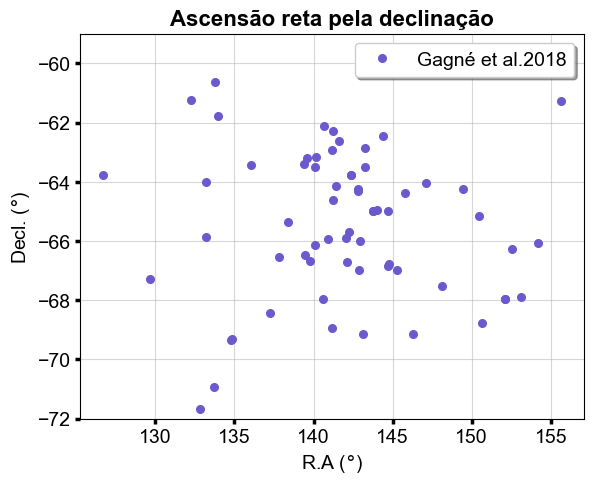

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
Ra = df["R.A"]
Decl = df["Decl."]

plt.figure(figsize=(6.5,5))
plt.plot(Ra, Decl, 'o', markersize=5.5, color='slateblue', label = 'Gagné et al.2018')
plt.title("Ascensão reta pela declinação",fontweight ='heavy',fontsize = 16)
plt.xlabel(r"R.A ($\degree$)")
plt.ylabel(r"Decl. ($\degree$)")
plt.ylim(-72, -59)
plt.legend(loc='upper right', shadow=True)
plt.grid(True)
#plt.savefig('asc_dec_gagne.png',dpi=600,facecolor='w')
plt.show()

<a id='2.2'></a>
>> ### Gaia DR3
---

Utilizando os dados do Gaia DR3 foram feitos os gráfico de RA vs DEC sem e c/ as incertezas de medidas

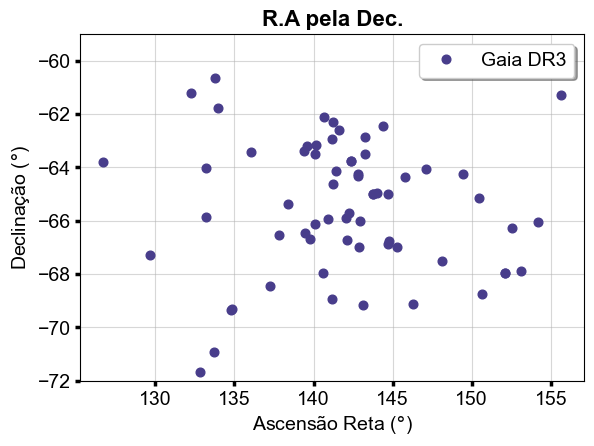

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
ra = df['ra']
dec = df['dec']

plt.figure(figsize=(6.5,4.5))
plt.plot(ra, dec, '.', markersize=12.5, color='darkslateblue',
         label = 'Gaia DR3')
plt.title("R.A pela Dec.", fontweight='heavy', fontsize = 16)
plt.xlabel(r"Ascensão Reta ($\degree$)")
plt.ylabel("Declinação ($\degree$)")
plt.ylim(-72, -59)
plt.legend(loc='upper right', shadow=True)
plt.grid(True)
plt.show()

<span style='color:blue'>**O plot abaixo foi feito utilizando as incertezas dos dados**</span>

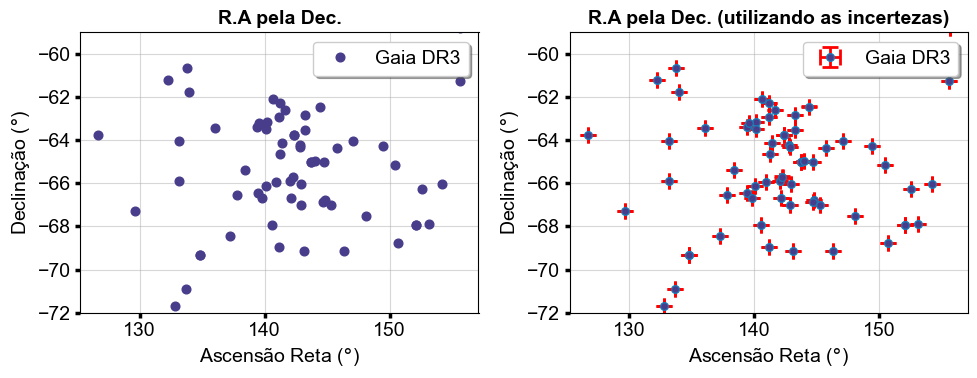

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
ra = df['ra']
dec = df['dec']

# milli-second of arc
ra_erro = df["ra_error"]
dec_erro = df["dec_error"]

# second of arc
ra_erro_arcsec = (df["ra_error"])/1000
dec_erro_arcsec = (df["dec_error"])/1000


fig,axes = plt.subplots(1,2, figsize=(10,4))
    # eixo 1:
ax = axes[0]
ax.plot(ra, dec, '.', markersize=12.5, color='darkslateblue', label = 'Gaia DR3')
ax.set_title("R.A pela Dec.", fontweight='heavy', fontsize = 14)
ax.set_xlabel(r"Ascensão Reta ($\degree$)")
ax.set_ylabel("Declinação ($\degree$)")
ax.set_ylim(-72, -59)
ax.legend(loc='upper right', shadow=True)
ax.grid(True)
    
    # eixo 2:
ax = axes[1]
ax.errorbar(ra,dec, yerr = dec_erro_arcsec, xerr = ra_erro_arcsec, fmt = 'o', ecolor='red', 
             elinewidth=2, capsize=6, capthick=2, markerfacecolor='darkslateblue', ms=5.5)
ax.set_title("R.A pela Dec. (utilizando as incertezas)", fontweight='heavy', fontsize = 14)
ax.set_xlabel(r"Ascensão Reta ($\degree$)")
ax.set_ylabel("Declinação ($\degree$)")
ax.set_ylim(-72, -59)
ax.legend(['Gaia DR3'],loc='upper right', shadow=True)
ax.grid(True)
plt.tight_layout()
plt.show()

<a id='3'></a>
> ## Longitude vs Latitude
---


#### Gráfico de posições no sistema de coordenadas galácticas Longitude (symbol l) e Latitude (symbol b).

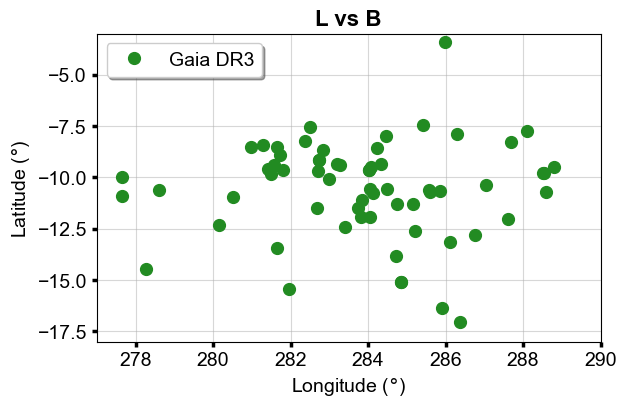

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
l = df['l']
b = df['b']


plt.figure(figsize=(6.5,4))
plt.plot(l, b, 'o', markersize=8.5, color='forestgreen', label = 'Gaia DR3')
plt.title("L vs B", fontweight='heavy', fontsize = 16)
plt.xlabel(r"Longitude ($\degree$)")
plt.ylabel("Latitude ($\degree$)")
plt.ylim(-18, -3)
plt.xlim(277,290)
plt.legend(loc='upper left', shadow=True)
plt.grid(True)
plt.show()

<a id='4'></a>
> ##  Movimento próprio total vs Paralaxe
---

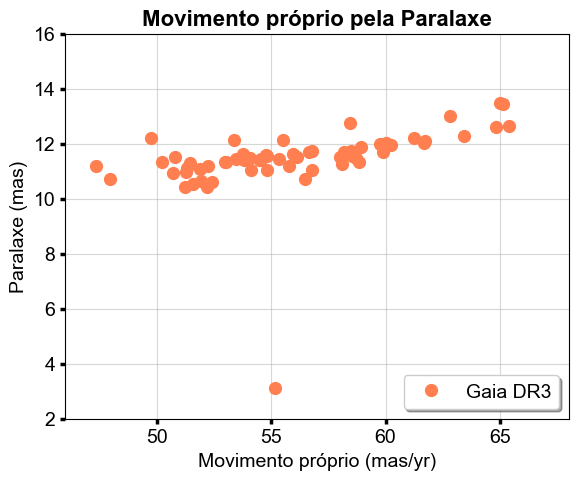

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
pm = df['pm']
parallax = df['parallax']


plt.figure(figsize=(6.5,5))
plt.plot(pm, parallax, 'o', markersize=8.5, color='coral', label = 'Gaia DR3')
plt.title("Movimento próprio pela Paralaxe", fontweight='heavy', fontsize = 16)
plt.xlabel(r"Movimento próprio (mas/yr)")
plt.ylabel("Paralaxe (mas)")
plt.ylim(2, 16)
plt.xlim(46,68)
plt.legend(loc='lower right', shadow=True)
plt.grid(True)
#plt.savefig('pmra_parallax.png',dpi=600,facecolor='w')
plt.show()

<span style='color:blue'>**Plot utilizando as incertezas dos dados**</span>

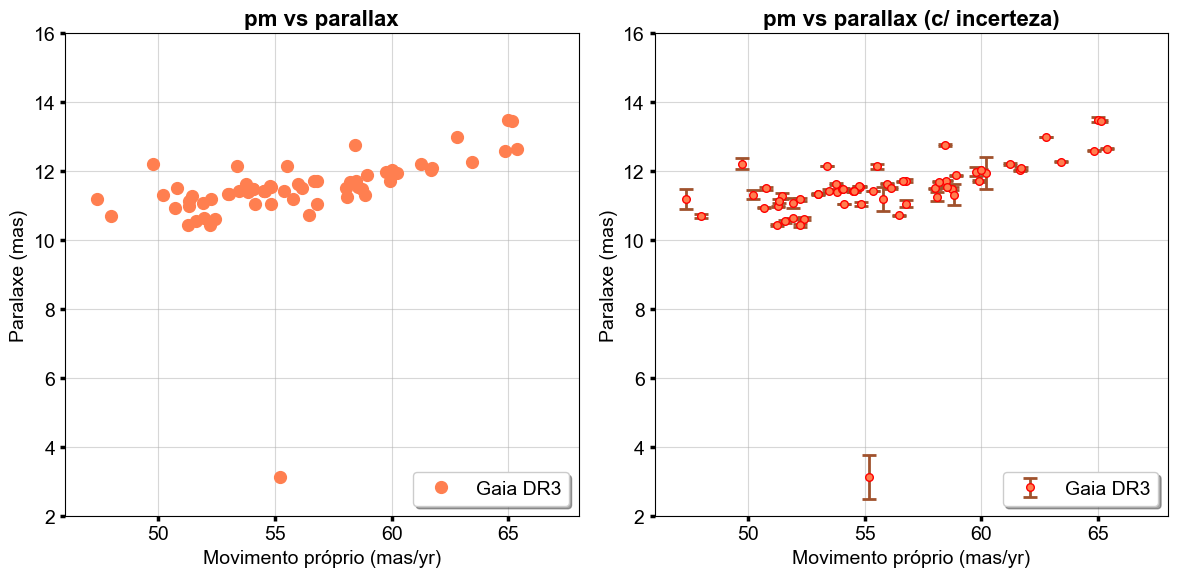

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
pm = df['pm']
parallax = df['parallax']
# erro
parallax_error = df['parallax_error']

fig,axes = plt.subplots(1,2, figsize=(12,6))
    # eixo 1,1 (pm):
ax = axes[0]
ax.plot(pm, parallax, 'o', markersize=8.5, color='coral', label = 'Gaia DR3')
ax.set_title("pm vs parallax", fontweight='heavy', fontsize = 16)
ax.set_xlabel(r"Movimento próprio (mas/yr)")
ax.set_ylabel("Paralaxe (mas)")
ax.set_ylim(2, 16)
ax.set_xlim(46,68)
ax.legend(loc='lower right', shadow=True)
ax.grid(True)
    
    # eixo 1,2:
ax = axes[1]
ax.errorbar(pm,parallax, yerr=parallax_error,fmt = 'o', ecolor='sienna', 
             elinewidth=2, capsize=5, capthick=2, markerfacecolor='coral', markeredgecolor='red', ms=5.5)
ax.set_title("pm vs parallax (c/ incerteza)", fontweight='heavy', fontsize = 16)
ax.set_xlabel(r"Movimento próprio (mas/yr)")
ax.set_ylabel("Paralaxe (mas)")
ax.set_ylim(2, 16)
ax.set_xlim(46,68)
ax.legend(['Gaia DR3'], loc='lower right', shadow=True)
ax.grid(True)
    
plt.tight_layout()
plt.show()


<a id='4.1'></a>

>>   ### Pmra pela paralaxe
---

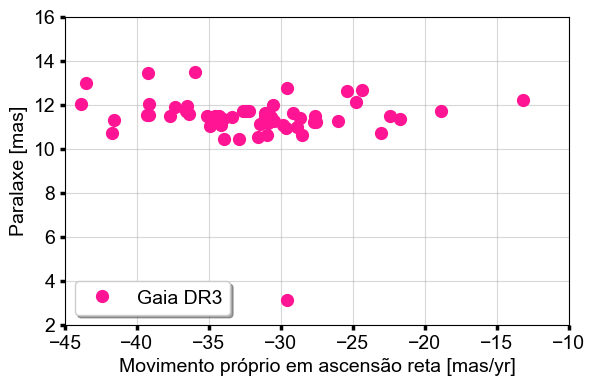

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
# movimento próprio em ascensão reta
pmra = df['pmra']
parallax = df['parallax']

plt.figure(figsize=(6.5,4))
plt.plot(pmra, parallax, 'o', markersize=8.5, color='deeppink', label = 'Gaia DR3')
#plt.title("Movimento próprio em ascensão reta vs Paralaxe", fontweight='heavy', fontsize = 16)
plt.xlabel(r"Movimento próprio em ascensão reta [mas/yr]")
plt.ylabel("Paralaxe [mas]")
plt.ylim(2, 16)
plt.xlim(-45,-10)
plt.legend(['Gaia DR3'], loc='lower left', shadow=True)
plt.grid(True)
plt.savefig('pmra_parallax.png',dpi=600,facecolor='w')
plt.show()

<a id='4.2'></a>

>>   ### Pmdec pela paralaxe
---

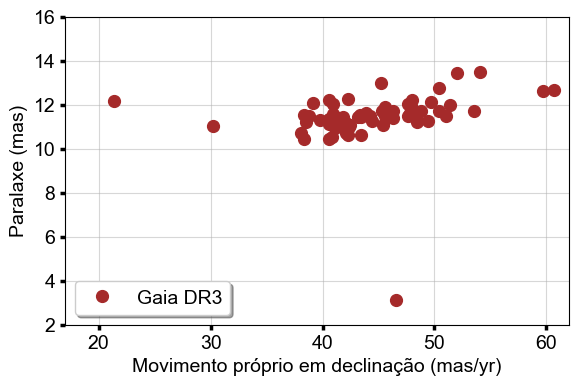

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
# movimento próprio em declinação
pmdec = df['pmdec']
parallax = df['parallax']

plt.figure(figsize=(6.5,4))
plt.plot(pmdec, parallax, 'o', markersize=8.5, color='brown', label = 'Gaia DR3')
#plt.title("Movimento próprio em declinação vs Paralaxe", fontweight='heavy', fontsize = 16)
plt.xlabel(r"Movimento próprio em declinação (mas/yr)")
plt.ylabel("Paralaxe (mas)")
plt.ylim(2, 16)
plt.xlim(17,62)
plt.legend(loc='lower left', shadow=True)
plt.grid(True)
plt.savefig('pmdec_parallax.png',dpi=600,facecolor='w')
plt.show()

<span style='color:red'>**Plot dos pm's junto com as incertezas**</span>

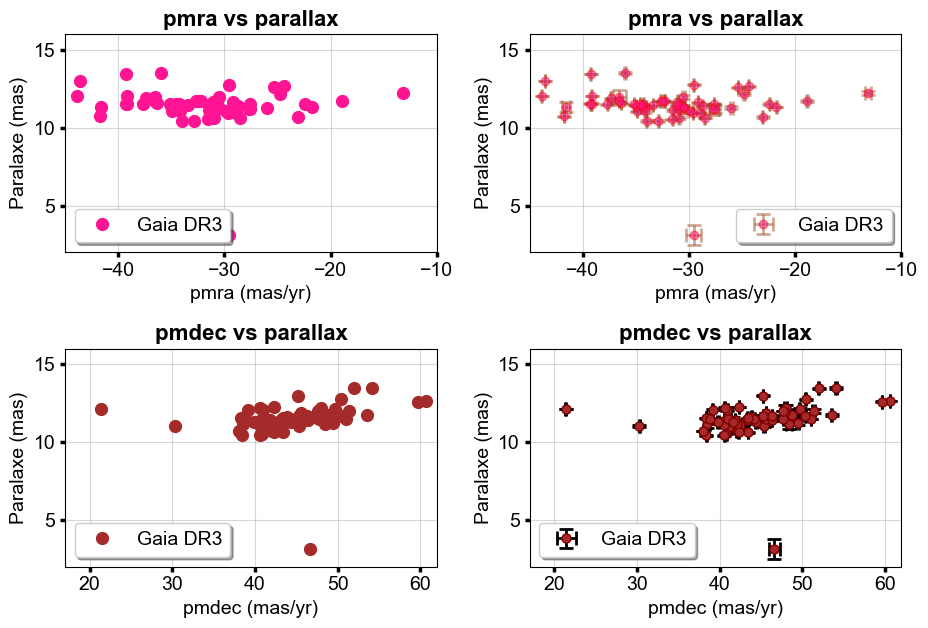

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
# movimento próprio em ascensão reta
pmra = df['pmra']
pmra_error = df['pmra_error']
parallax = df['parallax']
parallax_error = df['parallax_error']

# movimento próprio em declinação
pmdec = df['pmdec']
pmdec_error = df['pmdec_error']
parallax = df['parallax']
parallax_error = df['parallax_error']

fig,axes = plt.subplots(2,2, figsize=(9.5,6.5))
    # eixo 2,1 (pmra):
ax = axes[0][0]
ax.plot(pmra, parallax, 'o', markersize=8.5, color='deeppink', label = 'Gaia DR3')
ax.set_title("pmra vs parallax", fontweight='heavy', fontsize = 16)
ax.set_xlabel(r"pmra (mas/yr)")
ax.set_ylabel("Paralaxe (mas)")
ax.set_ylim(2, 16)
ax.set_xlim(-45,-10)
ax.legend(['Gaia DR3'], loc='lower left', shadow=True)
ax.grid(True)
    
    #eixo 2,2
ax = axes[0][1]
ax.errorbar(pmra,parallax, yerr=parallax_error,xerr=pmra_error,fmt = 'o', ecolor='sienna', 
             elinewidth=2, capsize=5, capthick=2, markerfacecolor='deeppink', markeredgecolor='red', ms=6.,alpha=0.5)
ax.set_title("pmra vs parallax", fontweight='heavy', fontsize = 16)
ax.set_xlabel(r"pmra (mas/yr)")
ax.set_ylabel("Paralaxe (mas)")
ax.set_ylim(2, 16)
ax.set_xlim(-45,-10)
ax.legend(['Gaia DR3'],loc='lower right', shadow=True)
ax.grid(True)
    
    # eixo 3,1 (pmra):
ax = axes[1][0]
ax.plot(pmdec, parallax, 'o', markersize=8.5, color='brown', label = 'Gaia DR3')
ax.set_title("pmdec vs parallax", fontweight='heavy', fontsize = 16)
ax.set_xlabel(r"pmdec (mas/yr)")
ax.set_ylabel("Paralaxe (mas)")
ax.set_ylim(2, 16)
ax.set_xlim(17,62)
ax.legend(loc='lower left', shadow=True)
ax.grid(True)
    
    # eixo 3,2 (pmdec):
ax = axes[1][1]
ax.errorbar(pmdec,parallax, yerr=parallax_error,xerr=pmdec_error,fmt = 'o', ecolor='black', 
             elinewidth=2, capsize=5, capthick=2, markerfacecolor='brown', markeredgecolor='maroon', ms=6.5)
ax.set_title("pmdec vs parallax", fontweight='heavy', fontsize = 16)
ax.set_xlabel(r"pmdec (mas/yr)")
ax.set_ylabel("Paralaxe (mas)")
ax.set_ylim(2, 16)
ax.set_xlim(17,62)
ax.legend(['Gaia DR3'],loc='lower left', shadow=True)
ax.grid(True)
    
plt.tight_layout()
plt.show()
    

<a id='5'></a>
> ##  Histograma
---

Aqui os histogramas são utilizados para ilustrar a distribuição dos dados.

<a id='5.1'></a>

>>   ### Paralaxe
---

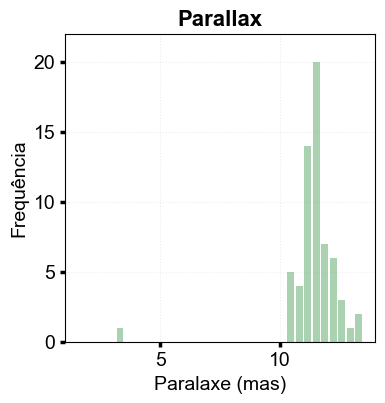

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
parallax = df['parallax']

plt.figure(figsize=(4,4))
plt.hist(parallax, bins='auto', alpha=0.7, color='#86bf91', zorder=2, rwidth=0.8)
plt.title("Parallax",fontsize = 16, fontweight='bold')
plt.xlabel(r"Paralaxe (mas)")
plt.ylabel("Frequência")
plt.grid(True,linestyle='dotted', color='gainsboro')
plt.ylim(0,22)
plt.xlim(1,14)
plt.show()

<a id='5.2'></a>

>>   ### Movimento Próprio total
---

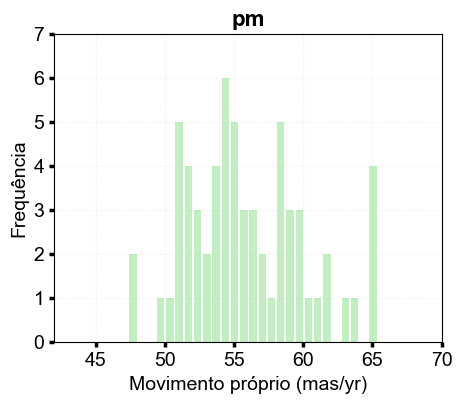

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
pm = df['pm']

plt.figure(figsize=(5,4))
plt.hist(pm, bins=27, alpha=0.3, color='limegreen', zorder=2, rwidth=0.8)
plt.title("pm",fontsize = 16, fontweight='bold')
plt.xlabel(r"Movimento próprio (mas/yr)")
plt.ylabel("Frequência")
plt.grid(True,linestyle='dotted', color='gainsboro')
plt.ylim(0,7)
plt.xlim(42,70)
plt.show()

<a id='5.3'></a>

>>   ### Movimento próprio em Ascensão reta
---

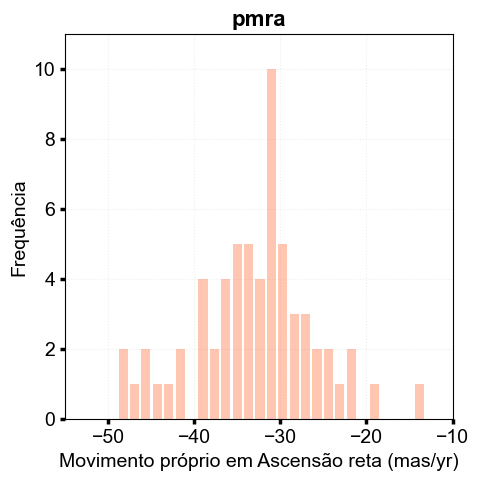

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
pmra = df['pmra']

plt.figure(figsize=(5,5))
plt.hist(pmra, bins=27, alpha=0.3, color='orangered', zorder=2, rwidth=0.8)
plt.title("pmra",fontsize = 16, fontweight='bold')
plt.xlabel(r"Movimento próprio em Ascensão reta (mas/yr)")
plt.ylabel("Frequência")
plt.grid(True,linestyle='dotted', color='gainsboro')
plt.ylim(0,11)
plt.xlim(-55,-10)
plt.show()

<a id='5.4'></a>

>>   ### Movimento próprio em declinação
---

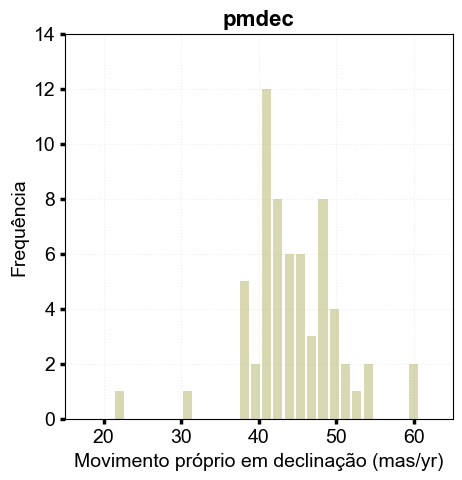

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"
df=pd.read_csv(VCA)
pmdec = df['pmdec']

plt.figure(figsize=(5,5))
plt.hist(pmdec, bins=27, alpha=0.3, color='olive', zorder=2, rwidth=0.8)
plt.title("pmdec",fontsize = 16, fontweight='bold')
plt.xlabel(r"Movimento próprio em declinação (mas/yr)")
plt.ylabel("Frequência")
plt.grid(True,linestyle='dotted', color='gainsboro')
plt.ylim(0,14)
plt.xlim(15,65)
plt.show()

<a id='6'></a>

>  ## Gráfico de vetor de movimento
---


A ascensão reta $(\alpha)$ e a declinação podem ser calculadas (previstas) utilizando os dados do catalogo e as seguintes equações:  

$$
  \alpha_f = \alpha_i + \mu_{\alpha}\times(t-t_0)
$$

$$
  \delta_f = \delta_i + \mu_{\delta}\times(t-t_0)
$$

onde $t_0$ é o ano em que as medidas de $\alpha(ra)$ e $\delta(dec)$ foram feitas, neste caso 2016, e $t$ é o ano em que se deseja prever os resultados.

[The Motions of the Stars](https://www.astronomy.ohio-state.edu/pogge.1/Ast162/Unit1/motions.html)

Aqui é importante ressaltar que nem todas as estrelas analisadas neste estudo possuem dados de pm's, abaixo indentificamos 2 que não possuem medições **(2MASS J09254243-6408524 e 2MASS J09285886-6541371)** e para que o gráfico "desse certo" foi preenchido o campo vazio **(NAN)** com o valor zero usando a função [.fillna(0)], usando outra função a **df[df['column name'].isna()]** identificamos quais eram as linhas e foi possivel printar as linhas completas. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
pmdec = df['pmdec']
pmdec[37:45]

37    50.384846
38    39.813922
39          NaN
40    42.307094
41    51.391909
42          NaN
43    43.473191
44    41.831958
Name: pmdec, dtype: float64

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
pmdec = df['pmdec']
df[df['pmdec'].isna()]

,VCA_ID,Name,2MASS_ID_J,Binario,Outlier,Vel_radial,Erro_Vel_Radial,Fonte/Obs.,Type_Spec.,R.A.(hh:mm:ss.sss),...,err_U_84,err_V_16,err_V_84,err_W_16,err_W_84,mag_abs_g,BHAC15_Myr,Log_BHAC15,Parsec_Myr,Log_Parsec
39,NaN,09254243-6408524,09254243-6408524,0,0,NaN,NaN,NaN,(M7),09:25:42.362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,09285886-6541371,09285886-6541371,0,0,NaN,NaN,NaN,(M9),09:28:58.791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
pmra = df['pmra']
pmra[37:45]

37   -32.401160
38   -30.598914
39          NaN
40   -30.934758
41   -30.520431
42          NaN
43   -31.107998
44   -34.982969
Name: pmra, dtype: float64

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
pmra = df['pmra']
df[df['pmra'].isna()]

,VCA_ID,Name,2MASS_ID_J,Binario,Outlier,Vel_radial,Erro_Vel_Radial,Fonte/Obs.,Type_Spec.,R.A.(hh:mm:ss.sss),...,err_U_84,err_V_16,err_V_84,err_W_16,err_W_84,mag_abs_g,BHAC15_Myr,Log_BHAC15,Parsec_Myr,Log_Parsec
39,NaN,09254243-6408524,09254243-6408524,0,0,NaN,NaN,NaN,(M7),09:25:42.362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,09285886-6541371,09285886-6541371,0,0,NaN,NaN,NaN,(M9),09:28:58.791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para plotar o gráfico foi necessário converter as unidades dos pm's de mas/yr -> graus/yr para que ficassem nas mesmas unidades do $\alpha$ e $\delta$. Então $\div$ o pm por 1000 (mili) e depois por por 3600.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

# filling missing value using fillna()  
#df.fillna(0)
df=pd.read_csv(VCA)
pmra = df['pmra']
pmdec = df['pmdec']
ra = df['ra']
dec = df['dec']

pmr = ((pmra/(1000))/3600).fillna(0)
pmd = ((pmdec/(1000))/3600).fillna(0)

t =50*2016
t0 = 2016
diff = t-t0

alpha = ra + pmr*(t - t0)
delta = dec + pmd*(t - t0)

print(pmdec)

0     38.512696
1     42.377824
2     41.356903
3     44.381270
4     42.318313
        ...    
60    38.036241
61    38.786924
62    40.603972
63    39.181376
64    30.254324
Name: pmdec, Length: 65, dtype: float64


In [24]:
## Analise incompleta

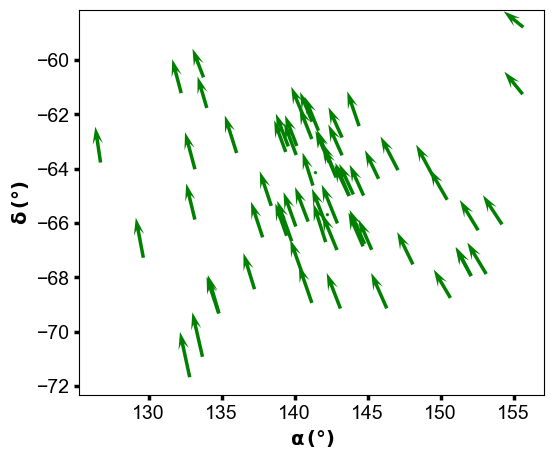

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

# gera a figura
df=pd.read_csv(VCA)
ra = df['ra']
dec = df['dec']
t =50*2016
t0 = 2016
diff = t-t0

alpha = ra + pmr*(t - t0)
delta = dec + pmd*(t - t0)


plt.figure(figsize=(6,5))
#Plota os pontos iniciais e a projeção futura(alpha,delta) com base no movimento próprio
#plt.scatter(ra, dec, color='r', zorder=5)#inicio
#plt.scatter(alpha, delta, color='blue', zorder=5)#fim

# Pontos iniciais(x,y)
x=ra
y=dec
#Plot do "vetor"
plt.quiver(x, y, alpha-x, delta-y, scale_units='xy', angles='xy', scale=1,color='g',headwidth=3,
           headaxislength=3.5,width=0.0075, label=diff)
#plt.title('Proper motion of VCA',fontsize = 22, fontweight='bold')
plt.xlabel(r"$\bf\alpha\, (\degree)$")
plt.ylabel(r"$\bf\delta\, (\degree)$")
#plt.legend(shadow=True, loc=4)
plt.show()

<a id='7'></a>

>  ## Gauss Fit
---


Para fazer o ajuste é necessário obter o valor da média **(np.mean)** e o desvio padrão **(np.std)**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#dados
VCA = "VCA_MCM.csv"

df=pd.read_csv(VCA)
parallax = df['parallax']

mean_par=np.mean(parallax)
std_par=np.std(parallax)

O gráfico é gerado a partir do histograma e nele é ajustado uma gaussiana utilizando a função **scipy.stats import norm**, o resultado do valor médio e do std é plotado por vline(linhas verticais).

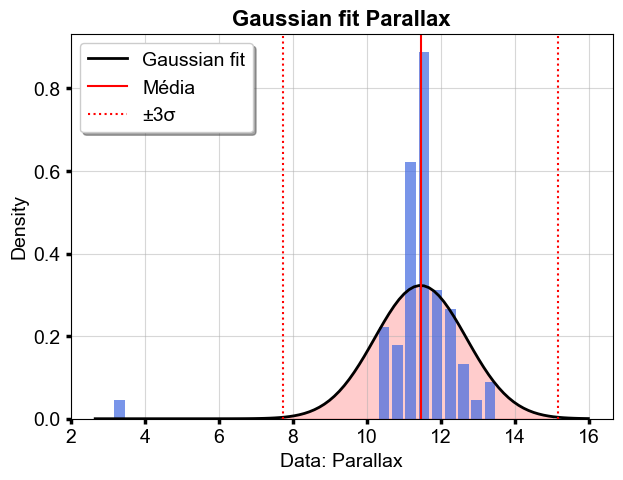

In [27]:
from scipy.stats import norm

plt.figure(figsize=(7,5))
# Plot the histogram
plt.hist(parallax, bins='auto', density=True, alpha=0.7, color='royalblue', zorder=2, rwidth=0.8)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax+2, 100)
p = norm.pdf(x, mean_par, std_par)
low_par = mean_par-3*std_par
hight_par = mean_par+3*std_par

plt.plot(x, p, 'k', lw=2, label='Gaussian fit')
plt.axvline(x = mean_par, color = 'r', label = 'Média')
plt.axvline(x = mean_par-3*std_par, color = 'red', linestyle='dotted',label = '±3σ')
plt.axvline(x = mean_par+3*std_par, color = 'red', linestyle='dotted')

# Slice the data on ±3σ
plt.fill_between(x,p,where=(low_par<x)&(x<hight_par), alpha=0.2, color='red')

plt.xlabel("Data: Parallax")
plt.ylabel("Density")
plt.title('Gaussian fit Parallax',fontsize = 16, fontweight='bold')
plt.legend(shadow=True)
plt.grid("on")

plt.savefig('gaussfit_parallax.png',dpi=600,facecolor='w')
plt.show()

No gráfico de paralaxe nota-se um outlier, para indentificar e excluir o dado da amostra vamos usar o procedimento abaixo:

In [28]:
df=pd.read_csv(VCA)
Name = df["Name"]

mean_par=np.mean(parallax)
std_par=np.std(parallax)
low_par = mean_par-3*std_par
hight_par = mean_par+3*std_par

# Position of the Outlier
print(np.where(low_par>parallax))

print("Identificador: 2MASS J{Name}".format(Name=df["Name"][52]))


(array([52]),)
Identificador: 2MASS J09374003-6226201


Removendo o outlier (estrela: 2MASS J09374003-6226201)

In [29]:
df=pd.read_csv(VCA)
print("Old Shape: ", df.shape)

# Removing the outliers
#df = df.drop(52)
 
#print("New Shape: ", df.shape)

#df.to_csv('VCA.csv', index=False)

Old Shape:  (65, 191)


In [30]:
#Checando
#print(df['Name'][49:54], df['parallax'][49:54])

In [31]:
#df=pd.read_csv('VCA.csv')

**Radial Velocity:** 

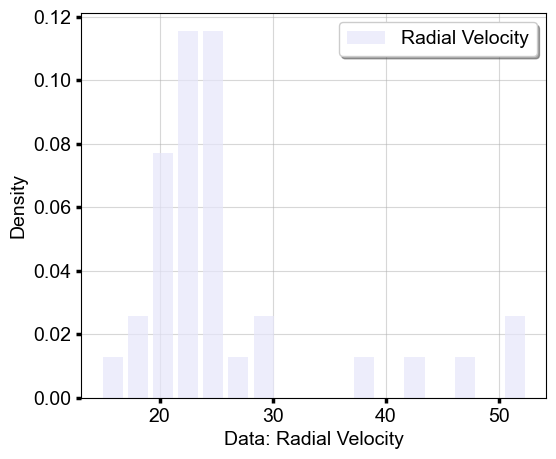

In [32]:
vel_rad=df['radial_velocity']
mean_velrad=np.mean(vel_rad)
std_velrad=np.std(vel_rad)

plt.figure(figsize=(6,5))
plt.hist(vel_rad, bins='auto', density=True, alpha=0.7, color='lavender', zorder=2, rwidth=0.8, label='Radial Velocity')
plt.xlabel("Data: Radial Velocity")
plt.ylabel("Density")
#plt.title('Gaussian fit Radial Velocity',fontsize = 22, fontweight='bold')
plt.legend(ncol=2,shadow=True)
plt.grid("on")
#plt.savefig('radvel.png',dpi=600,facecolor='w')
plt.show()

In [33]:
print(r"Média = {:.2f}".format(mean_velrad))
print(r"σ = {:.2f}".format(std_velrad))

Média = 26.20
σ = 9.06


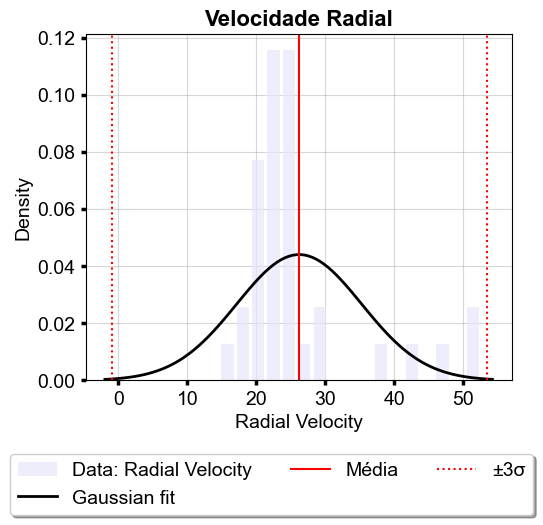

In [34]:
plt.figure(figsize=(5.5,4.5))
# Plot the histogram
plt.hist(vel_rad, bins='auto', density=True, alpha=0.7, color='lavender', zorder=2, rwidth=0.8, label='Data: Radial Velocity')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin-15, xmax, 100)
p = norm.pdf(x, mean_velrad, std_velrad)

low_velrad=mean_velrad-3*std_velrad
hight_velrad=mean_velrad+3*std_velrad

plt.plot(x, p, 'k', lw=2, label='Gaussian fit')
plt.axvline(x = mean_velrad, color = 'r', label = 'Média')
plt.axvline(x = low_velrad, color = 'red', linestyle='dotted',label = '±3σ')
plt.axvline(x = hight_velrad, color = 'red', linestyle='dotted')

# Slice the data on ±3σ
#plt.fill_between(x,p,where=(low_pmdec<x)&(x<hight_pmdec), alpha=0.2, color='red')

plt.xlabel("Radial Velocity")
plt.ylabel("Density")
plt.title('Velocidade Radial',fontsize = 16, fontweight='bold')
plt.legend(loc='center left',ncol=3,shadow=True,bbox_to_anchor=(-0.2, -0.3))
plt.grid("on")
plt.savefig('radvel.png',dpi=600,facecolor='w')
plt.show()

<a id='8'></a>

>  ### Velocidade espacial em coordenadas galacticas
---

<a id='8.1'></a>
>> **MÉTODO USANDO O ARTIGO** 

<a id='8.2'></a>
>> ### MÉTODO USANDO O astropy.coordinates

- usando a função **astropy.table import Table** também conseguimos ler arquivos. A variavel **result** é uma Astropy Table.

In [35]:
from astropy.table import Table

filename = 'VCA_MCM.csv'
results = Table.read(filename)

We can use **.info** for prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [36]:
results.info;

We can get the names of the columns like this:

In [37]:
results.colnames;

To do the transformation, we’ll put the results into a SkyCoord object. To do this we'll need do some imports like **from astropy.coordinates import SkyCoord** and **import astropy.units as u**

<a id='8.2.1'></a>

### <span style='color:red'>**Comparação c/ os resultados do artigo do Johnson para as coordenadas**</span>

**Calcular as velocidades**. 

Criando um dataFrame c/ as 4 primeiras estrelas do artigo:

In [38]:
import pandas as pd
## assign data of lists.  
data = {'HD': ['11131', '39587', '41593', '50692'], 'pmra': [-144, -184, -110, -38], 
        'errpmra': [3.4, 1.4, 4.1, 2.2], 'pmdec': [-88, -87, -111, 19],
        'errpmdec': [3.2, 1.1, 3.9, 1.8], 'parallax': [46.4, 104.1, 65.7, 54.2],
        'errparallax': [6.7, 5.8, 16.0, 10.0],'rv': [-1.5, -13.3, -11.7, -14.5], 
        'err_rv': [1.6, 0.3, 2.0, 0.4],
        'ra':[27.34656392669115, 88.59482419468164, 91.66810166362778, 103.82759156605087], 
        'err_ra':[0.18205829, 0.3168197, 0.02071461, 0.05130661],
        'dec':[-10.703948475569574, 20.275852148021837, 15.5416453082647, 25.375803135431426],
       'err_dec':[0.14114541, 0.31237152, 0.019476838, 0.05762174]}

# Create DataFrame  
df_teste = pd.DataFrame(data)  

# saving dataframe
filename = 'Ursa_Major.csv'
df_teste.to_csv(filename)

df_teste

,HD,pmra,errpmra,pmdec,errpmdec,parallax,errparallax,rv,err_rv,ra,err_ra,dec,err_dec
0,11131,-144,3.4,-88,3.2,46.4,6.7,-1.5,1.6,27.346564,0.182058,-10.703948,0.141145
1,39587,-184,1.4,-87,1.1,104.1,5.8,-13.3,0.3,88.594824,0.316820,20.275852,0.312372
2,41593,-110,4.1,-111,3.9,65.7,16.0,-11.7,2.0,91.668102,0.020715,15.541645,0.019477
3,50692,-38,2.2,19,1.8,54.2,10.0,-14.5,0.4,103.827592,0.051307,25.375803,0.057622


Fazendo a transformação de coordenadas e velocidades utilizando o astropy.coordinates.

In [39]:
import pandas as pd
import numpy as np
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord

Ursa = 'Ursa_Major.csv'
df_teste = pd.read_csv(Ursa)

ra       = u.Quantity(df_teste['ra'], unit=u.degree)
dec      = u.Quantity(df_teste['dec'], unit=u.degree)
parallax = u.Quantity(df_teste['parallax'], unit=u.mas)
dist = parallax.to(u.pc, u.parallax())

pmra         = u.Quantity(df_teste['pmra'], unit=u.mas/u.year)
pm_ra_cosdec = u.Quantity((pmra*np.cos(dec)), unit=u.mas/u.yr)
pm_dec       = u.Quantity(df_teste['pmdec'], unit=u.mas/u.year)
rv           = u.Quantity(df_teste['rv'], unit=u.km/u.second)

coords = coord.SkyCoord(ra=ra, dec=dec, distance=dist,
                      pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec, 
                      radial_velocity=rv, frame='icrs').transform_to(Galactic)
pos = coords.cartesian.get_xyz().transpose()
vel = coords.cartesian.differentials["s"].get_d_xyz().transpose()
print(vel) 

[[ 16.40485178   1.86475155  -4.41069148]
 [ 13.47498035   2.55221087  -8.14077079]
 [ 12.58953405  -0.23869104 -10.04750359]
 [ 13.02733918   5.19896287  -5.02873802]] km / s


In [40]:
# seleciona a primeira entrada da matriz
vel[0][0]

<Quantity 16.40485178 km / s>

<a id='8.3'></a>
>> ## Monte-Carlo Propagação de incerteza

**Calculada as incertezas**. 

df_teste é dataframe criado com os dados de 4 estrelas do artigo do Johnson.

In [41]:
df_teste

,Unnamed: 0,HD,pmra,errpmra,pmdec,errpmdec,parallax,errparallax,rv,err_rv,ra,err_ra,dec,err_dec
0,0,11131,-144,3.4,-88,3.2,46.4,6.7,-1.5,1.6,27.346564,0.182058,-10.703948,0.141145
1,1,39587,-184,1.4,-87,1.1,104.1,5.8,-13.3,0.3,88.594824,0.316820,20.275852,0.312372
2,2,41593,-110,4.1,-111,3.9,65.7,16.0,-11.7,2.0,91.668102,0.020715,15.541645,0.019477
3,3,50692,-38,2.2,19,1.8,54.2,10.0,-14.5,0.4,103.827592,0.051307,25.375803,0.057622


---
Utilizamos a técnica de propagação de erro de Monte Carlo para gerar N conjuntos de valores iniciais de RA, DEC, Paralaxe, PMDEC, PMRA e RV. Cada conjunto foi corrigido pelo seu respectivo erro e convertido para coordenadas XYZ e velocidades galácticas UVW por meio da função astropy.coordinates. Para cada estrela, obtemos N resultados para cada componente, que serão utilizados posteriormente para calcular a média/mediana dos valores, resultando em um único valor para cada componente e sua respectiva incerteza, que será calculada por desvio padrão e tambem por percentil/quartil.  

Para gerar os N conjuntos foi utilizando a função np.random.normal(size=N), seguindo o passa a passo do video abaixo com algumas modificações para que as iterações fossem em cada linha do dataframe.  

[Monte-Carlo Propagation of Uncertainty](https://www.youtube.com/watch?v=V4U6RFI6HW8)

---

In [42]:
import pandas as pd
import numpy as np
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord


Ursa = 'Ursa_Major.csv'
df_teste = pd.read_csv(Ursa)


N = 1000 
raMC = []
decMC = []
parallaxMC = []

for index, row in df_teste.iterrows():
    raMC.append(row['ra'] + (row['err_ra']/1000)*np.random.normal(size=N))

   
for index, row in df_teste.iterrows():
    decMC.append(row['dec'] + (row['err_dec']/1000)*np.random.normal(size=N))
    
for index, row in df_teste.iterrows():
    parallaxMC.append(row['parallax'] + row['errparallax']*np.random.normal(size=N))
    
ra       = u.Quantity(raMC, unit=u.degree)
dec      = u.Quantity(decMC, unit=u.degree)
parallax = u.Quantity(parallaxMC, unit=u.mas)
dist = parallax.to(u.pc, u.parallax())


pmraMC = []
pmdecMC = []
rvMC = []

for index, row in df_teste.iterrows():
    pmraMC.append(row['pmra'] + row['errpmra']*np.random.normal(size=N))
    
for index, row in df_teste.iterrows():
    pmdecMC.append(row['pmdec'] + row['errpmdec']*np.random.normal(size=N))
    
for index, row in df_teste.iterrows():
    rvMC.append(row['rv'] + row['err_rv']*np.random.normal(size=N))

pmra         = u.Quantity(pmraMC, unit=u.mas/u.year)
pm_ra_cosdec = u.Quantity((pmra*np.cos(dec)), unit=u.mas/u.yr)
pm_dec       = u.Quantity(pmdecMC, unit=u.mas/u.year)
rv           = u.Quantity(rvMC, unit=u.km/u.second)

coords = coord.SkyCoord(ra=ra, dec=dec, distance=dist,
                      pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec, 
                      radial_velocity=rv, frame='icrs').transform_to(Galactic)
pos = coords.cartesian.get_xyz().transpose()
vel = coords.cartesian.differentials["s"].get_d_xyz().transpose()


#print(vel)

**Abaixo um jeito simples para selecionar uma coluna inteira da matriz de velocidades (vel)**

In [43]:
#seleciono toda a primeira coluna
first_column = vel[:,:,0]

#print(first_column)

<a id='8.3.1'></a>
### Monte-Carlo Propagação de incerteza: única estrela

In [44]:
import pandas as pd
import numpy as np
import astropy.units as u

saidaU = []
saidaV = []
saidaW = []

# "saida" ficou formada por uma lista de objetos Quantity
for matriz in vel:
    saidaU.append(matriz[0][0])
    saidaV.append(matriz[0][1])
    saidaW.append(matriz[0][2])

# transformando em um array convencional de números
U = np.array([q.value for q in saidaU])
V = np.array([q.value for q in saidaV])
W = np.array([q.value for q in saidaW])


#print("U:")
#print(U)
#print("V:")
#print(V)
#print("W:")
#print(W)

---
#### Média, desvio padrão e histograma

---

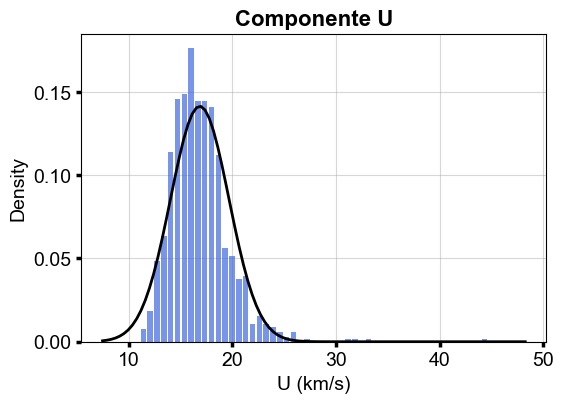

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Comp U
mean=np.mean(U)
std=np.std(U)
plt.figure(figsize=(6,4))

# Plot the histogram
plt.hist(U, bins='auto', density=True, alpha=0.7, color='royalblue', zorder=2, rwidth=0.8)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin-2, xmax+2, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', lw=2)

plt.xlabel("U (km/s)")
plt.ylabel("Density")
plt.title('Componente U',fontsize = 16, fontweight='bold')
#plt.legend(shadow=True)
plt.grid("on")
#plt.xlim(8,30)
plt.show()


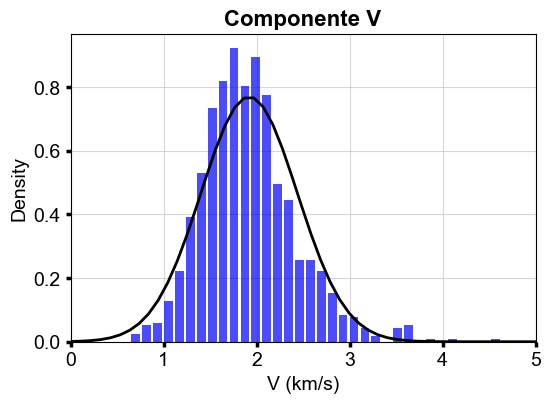

In [46]:
# Comp V
mean=np.mean(V)
std=np.std(V)
plt.figure(figsize=(6,4))

# Plot the histogram
plt.hist(V, bins='auto', density=True, alpha=0.7, color='blue', zorder=2, rwidth=0.8)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin-2, xmax+2, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', lw=2)

plt.xlabel("V (km/s)")
plt.ylabel("Density")
plt.title('Componente V',fontsize = 16, fontweight='bold')
#plt.legend(shadow=True)
plt.grid("on")
plt.xlim(0,5)
plt.show()

In [47]:
print("Valor de U: {0:5.1f} +/- {1:5.1f} km/s".format(U.mean(), U.std()))
print("Valor de V: {0:5.1f} +/- {1:5.1f} km/s".format(V.mean(), V.std()))
print("Valor de W: {0:5.1f} +/- {1:5.1f} km/s".format(W.mean(), W.std()))

Valor de U:  16.9 +/-   2.8 km/s
Valor de V:   1.9 +/-   0.5 km/s
Valor de W:  -4.5 +/-   1.8 km/s


#### Calculando a mediana e a incerteza por quartil/percentil

In [48]:
import pandas as pd
import numpy as np
import astropy.units as u

saidaU = []
saidaV = []
saidaW = []

# "saida" ficou formada por uma lista de objetos Quantity
for matriz in vel:
    saidaU.append(matriz[0][0])
    saidaV.append(matriz[0][1])
    saidaW.append(matriz[0][2])

# transformando em um array convencional de números
U = np.array([q.value for q in saidaU])
V = np.array([q.value for q in saidaV])
W = np.array([q.value for q in saidaW])

# mediana
mediana_U = np.median(U)
mediana_V = np.median(V)
mediana_W = np.median(W)

# quartis 16% e 84%

quartil_16_U = np.percentile(U, 16)
quartil_84_U = np.percentile(U, 84)

quartil_16_V = np.percentile(V, 16)
quartil_84_V = np.percentile(V, 84)

quartil_16_W = np.percentile(W, 16)
quartil_84_W = np.percentile(W, 84)

# incertezas calculadas pela diferença entre a mediana e os quartis

sigma_U_16 = mediana_U - quartil_16_U
sigma_U_84 = mediana_U - quartil_84_U

sigma_V_16 = mediana_V - quartil_16_V
sigma_V_84 = mediana_V - quartil_84_V

sigma_W_16 = mediana_W - quartil_16_W
sigma_W_84 = mediana_W - quartil_84_W

print("Valor de U: {0:5.1f} +{1:3.1f}{2:5.1f} km/s".format(mediana_U, 
    sigma_U_16, sigma_U_84))


Valor de U:  16.5 +2.1 -2.7 km/s


<a id='8.3.2'></a>
### Monte-Carlo Propagação de incerteza: Ursa Major (artigo)

In [49]:
# Fazendo a tranformação de coordenadas para todas as estrelas já usando o monte-carlo

import pandas as pd
import numpy as np
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord


Ursa = 'Ursa_Major.csv'
df_teste = pd.read_csv(Ursa)


N = 1000
raMC = []
decMC = []
parallaxMC = []

for index, row in df_teste.iterrows():
    raMC.append(row['ra'] + (row['err_ra']/1000)*np.random.normal(size=N))

   
for index, row in df_teste.iterrows():
    decMC.append(row['dec'] + (row['err_dec']/1000)*np.random.normal(size=N))
    
for index, row in df_teste.iterrows():
    parallaxMC.append(row['parallax'] + row['errparallax']*np.random.normal(size=N))
    
ra       = u.Quantity(raMC, unit=u.degree)
dec      = u.Quantity(decMC, unit=u.degree)
parallax = u.Quantity(parallaxMC, unit=u.mas)
dist = parallax.to(u.pc, u.parallax())


pmraMC = []
pmdecMC = []
rvMC = []

for index, row in df_teste.iterrows():
    pmraMC.append(row['pmra'] + row['errpmra']*np.random.normal(size=N))
    
for index, row in df_teste.iterrows():
    pmdecMC.append(row['pmdec'] + row['errpmdec']*np.random.normal(size=N))
    
for index, row in df_teste.iterrows():
    rvMC.append(row['rv'] + row['err_rv']*np.random.normal(size=N))

pmra         = u.Quantity(pmraMC, unit=u.mas/u.year)
pm_ra_cosdec = u.Quantity((pmra*np.cos(dec)), unit=u.mas/u.yr)
pm_dec       = u.Quantity(pmdecMC, unit=u.mas/u.year)
rv           = u.Quantity(rvMC, unit=u.km/u.second)

coords = coord.SkyCoord(ra=ra, dec=dec, distance=dist,
                      pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec, 
                      radial_velocity=rv, frame='icrs').transform_to(Galactic)
pos = coords.cartesian.get_xyz().transpose()
vel = coords.cartesian.differentials["s"].get_d_xyz().transpose()
#print(vel)

individualizar as saídas

In [50]:
saidaU = []
saidaV = []
saidaW = []

N = N
for i in range(N): # loop para todas as entradas
    vel_estrela = vel[i] # seleciona a matriz de velocidades da estrela i
    saidaU_estrela = []
    saidaV_estrela = []
    saidaW_estrela = []
    for matriz in vel_estrela:
        u, v, w = matriz[0], matriz[1], matriz[2]
        if u.isscalar:
            saidaU_estrela.append(u.value)
            saidaV_estrela.append(v.value)
            saidaW_estrela.append(w.value)
        else:
            saidaU_estrela.append(u.value[0])
            saidaV_estrela.append(v.value[0])
            saidaW_estrela.append(w.value[0])
    saidaU.append(saidaU_estrela)
    saidaV.append(saidaV_estrela)
    saidaW.append(saidaW_estrela)

# transformando em arrays convencionais de números
U = np.array(saidaU)
V = np.array(saidaV)
W = np.array(saidaW)

# caso seja necessario imprimir as colunas de coordenadas
#print("U:")
#print(U[:, 0])
#print("V:")
#print(V)
#print("W:")
#print(W)
#print(vel)


Criando uma lista de lista para cada componente da velocidade para armazenar os dados de cada estrela. E calcula as medianas e percentis de cada sublista.

In [51]:
# criar uma lista vazia para armazenar os valores de U de cada estrela
valores_U = []

# iterar pelas colunas de U
for coluna in range(U.shape[1]):
    # armazenar os valores da coluna atual em uma lista
    valoresU = U[:, coluna].tolist()
    # adicionar a lista de valores da estrela à lista principal
    valores_U.append(valoresU)
#print(valores_U)

# criar uma lista vazia para armazenar os valores de cada estrela em V
valores_V = []

# iterar pelas colunas de V
for coluna in range(V.shape[1]):
    # armazenar os valores da coluna atual em uma lista
    valoresV = V[:, coluna].tolist()
    # adicionar a lista de valores da estrela à lista principal
    valores_V.append(valoresV)
    
# criar uma lista vazia para armazenar os valores de cada estrela em W
valores_W = []

# iterar pelas colunas de W
for coluna in range(W.shape[1]):
    # armazenar os valores da coluna atual em uma lista
    valoresW = W[:, coluna].tolist()
    # adicionar a lista de valores da estrela à lista principal
    valores_W.append(valoresW)

# Cálculo das medianas de cada sublista e adiciona uma nova coluna no dataframe
df_teste['U'] = np.median(valores_U, axis=1)
df_teste['V'] = np.median(valores_V, axis=1)
df_teste['W'] = np.median(valores_W, axis=1)

# PERCENTIS
# criar uma lista vazia para armazenar os quartis de cada coluna
U_16 = []
U_84 = []

# U 16%
for coluna in range(U.shape[1]):
    # calcular os quartis de 16% da coluna atual
    U16 = np.percentile(U[:, coluna], 16)
    # adicionar o quartil à lista de quartis
    U_16.append(U16)
    
# U 84%
for coluna in range(U.shape[1]):
    # calcular os quartis de 16% da coluna atual
    U84 = np.percentile(U[:, coluna], 84)
    # adicionar o quartil à lista de quartis
    U_84.append(U84)
    
df_teste['err_U_16'] = df_teste['U'] - U_16
df_teste['err_U_84'] = df_teste['U'] - U_84

V_16 = []
V_84 = []

# V 16%
for coluna in range(V.shape[1]):
    # calcular os quartis de 16% da coluna atual
    V16 = np.percentile(V[:, coluna], 16)
    # adicionar o quartil à lista de quartis
    V_16.append(V16)
    
# V 84%
for coluna in range(V.shape[1]):
    # calcular os quartis de 16% da coluna atual
    V84 = np.percentile(V[:, coluna], 84)
    # adicionar o quartil à lista de quartis
    V_84.append(V84)

df_teste['err_V_16'] = df_teste['V'] - V_16
df_teste['err_V_84'] = df_teste['V'] - V_84 

W_16 = []
W_84 = []

# W 16%
for coluna in range(W.shape[1]):
    # calcular os quartis de 16% da coluna atual
    W16 = np.percentile(W[:, coluna], 16)
    # adicionar o quartil à lista de quartis
    W_16.append(W16)
    
# W 84%
for coluna in range(W.shape[1]):
    # calcular os quartis de 16% da coluna atual
    W84 = np.percentile(W[:, coluna], 84)
    # adicionar o quartil à lista de quartis
    W_84.append(W84)

df_teste['err_W_16'] = df_teste['W'] - W_16
df_teste['err_W_84'] = df_teste['W'] - W_84 
    
#print(df_teste)
# saving dataframe
filename = 'final_Ursa_Major.csv'
df_teste.to_csv(filename)

print(df_teste)


   Unnamed: 0     HD  pmra  errpmra  pmdec  errpmdec  parallax  errparallax  \
0           0  11131  -144      3.4    -88       3.2      46.4          6.7   
1           1  39587  -184      1.4    -87       1.1     104.1          5.8   
2           2  41593  -110      4.1   -111       3.9      65.7         16.0   
3           3  50692   -38      2.2     19       1.8      54.2         10.0   

     rv  err_rv  ...   err_dec          U         V          W  err_U_16  \
0  -1.5     1.6  ...  0.141145  16.429715  1.888536  -4.450261  2.017347   
1 -13.3     0.3  ...  0.312372  13.474385  2.554029  -8.122647  0.292980   
2 -11.7     2.0  ...  0.019477  12.660947 -0.358940 -10.129376  2.097285   
3 -14.5     0.4  ...  0.057622  12.992301  5.193269  -5.022551  0.418929   

   err_U_84  err_V_16  err_V_84  err_W_16  err_W_84  
0 -2.717872  0.459014 -0.485118  1.848518 -1.628529  
1 -0.310798  0.074280 -0.077242  0.489262 -0.469610  
2 -1.959614  0.996197 -0.830435  3.300509 -2.149154  
3 -0.41

In [52]:
V_sim = df_teste["U"]
U_sim = df_teste["V"]

<a id='8.3.3'></a>
## Validação final com os dados do artigo Johnson

Utilizando os dados gerados para as componentes UVW e suas as incertezas foi feito um gráfico comparando os resultados com as 4 estrelas do artigo Johnson.

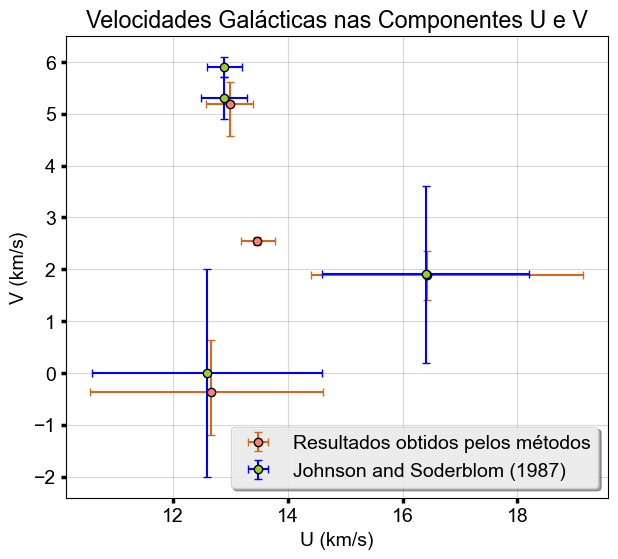

In [53]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

U_or = [16.4, 12.9, 12.6, 12.9]
erro_U_or = [1.8, 0.3, 2.0, 0.4]
V_or = [1.9, 5.9, 0.0, 5.3]
erro_V_or = [1.7, 0.2, 2.0, 0.4]
W_or = [-4.4, -6.8, -10.3, -5.3]
erro_W_or = [1.6, 0.4, 2.0, 0.6]

df = pd.read_csv('final_Ursa_Major.csv')
U = df['U']
V = df['V']
W = df['W']

lower_error_U = df['err_U_16']
upper_error_U = df['err_U_84']

upper_error_V = df['err_V_16']
lower_error_V = df['err_V_84']

#asymmetric_error_U = [lower_error_U,  -upper_error_U]
#asymmetric_error_V = [lower_error_V,  -upper_error_V]

asymmetric_error_U = [np.abs(lower_error_U), np.abs(upper_error_U)]
asymmetric_error_V = [np.abs(lower_error_V), np.abs(upper_error_V)]

U_or = [16.4, 12.9, 12.6, 12.9]
erro_U_or = [1.8, 0.3, 2.0, 0.4]
V_or = [1.9, 5.9, 0.0, 5.3]
erro_V_or = [1.7, 0.2, 2.0, 0.4]
W_or = [-4.4, -6.8, -10.3, -5.3]
erro_W_or = [1.6, 0.4, 2.0, 0.6]

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)
ax.errorbar(U, V, xerr=asymmetric_error_U, yerr=asymmetric_error_V, fmt='o', capsize=3, ecolor='chocolate',markerfacecolor='salmon', markeredgecolor='black', label='Resultados obtidos pelos métodos')
# Add double error bars for U_or and V_or
plt.errorbar(U_or, V_or, xerr=erro_U_or, yerr=erro_V_or, fmt='o', color='yellowgreen', ecolor='blue', capsize=3, markeredgecolor='black',label='Johnson and Soderblom (1987)')
plt.xlabel("U (km/s)")
plt.ylabel("V (km/s)")
plt.title("Velocidades Galácticas nas Componentes U e V")
plt.legend(shadow=True)
plt.grid("on")

plt.legend()
plt.savefig('comp_U_V.png', dpi=600)
plt.show()

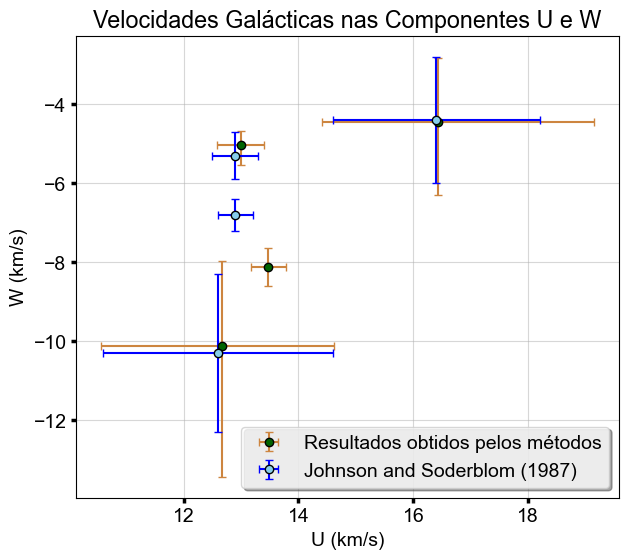

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_Ursa_Major.csv')
U = df['U']
V = df['V']
W = df['W']

lower_error_U = df['err_U_16']
upper_error_U = df['err_U_84']
lower_error_W_16 = df['err_W_16']
upper_error_W_84 = df['err_W_84']

asymmetric_error_U = [lower_error_U, -upper_error_U]
asymmetric_error_W = [lower_error_W_16, -upper_error_W_84]

U_or = [16.4, 12.9, 12.6, 12.9]
erro_U_or = [1.8, 0.3, 2.0, 0.4]
V_or = [1.9, 5.9, 0.0, 5.3]
erro_V_or = [1.7, 0.2, 2.0, 0.4]
W_or = [-4.4, -6.8, -10.3, -5.3]
erro_W_or = [1.6, 0.4, 2.0, 0.6]

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)
ax.errorbar(U, W, xerr=asymmetric_error_U, yerr=asymmetric_error_W, fmt='o', capsize=3, ecolor='peru',markerfacecolor='darkgreen', markeredgecolor='black', label='Resultados obtidos pelos métodos')
# Add double error bars for U_or and V_or
plt.errorbar(U_or, W_or, xerr=erro_U_or, yerr=erro_W_or, fmt='o', color='skyblue', ecolor='blue', capsize=3, markeredgecolor='black', label='Johnson and Soderblom (1987)')
plt.xlabel("U (km/s)")
plt.ylabel("W (km/s)")
plt.title("Velocidades Galácticas nas Componentes U e W")
plt.legend(shadow=True)
plt.grid("on")

plt.legend()
plt.savefig('comp_U_W.png', dpi=600)
plt.show()

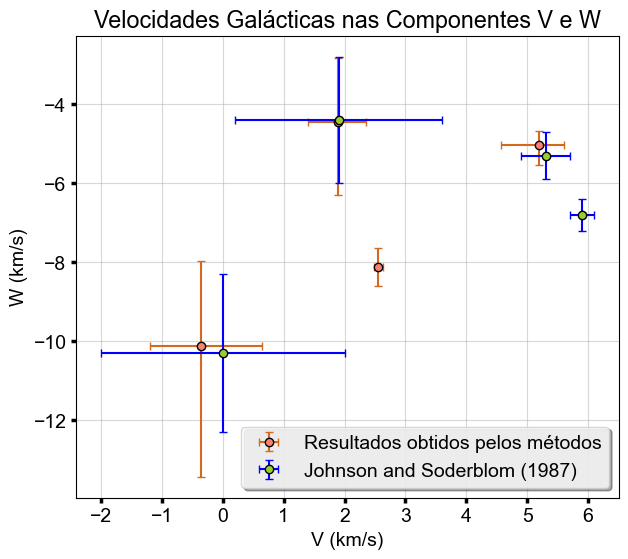

In [55]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

U_or = [16.4, 12.9, 12.6, 12.9]
erro_U_or = [1.8, 0.3, 2.0, 0.4]
V_or = [1.9, 5.9, 0.0, 5.3]
erro_V_or = [1.7, 0.2, 2.0, 0.4]
W_or = [-4.4, -6.8, -10.3, -5.3]
erro_W_or = [1.6, 0.4, 2.0, 0.6]

df = pd.read_csv('final_Ursa_Major.csv')
U = df['U']
V = df['V']
W = df['W']

lower_error_U = df['err_U_16']
upper_error_U = df['err_U_84']

upper_error_V = df['err_V_16']
lower_error_V = df['err_V_84']

#asymmetric_error_U = [lower_error_U,  -upper_error_U]
#asymmetric_error_V = [lower_error_V,  -upper_error_V]

asymmetric_error_U = [np.abs(lower_error_U), np.abs(upper_error_U)]
asymmetric_error_V = [np.abs(lower_error_V), np.abs(upper_error_V)]

U_or = [16.4, 12.9, 12.6, 12.9]
erro_U_or = [1.8, 0.3, 2.0, 0.4]
V_or = [1.9, 5.9, 0.0, 5.3]
erro_V_or = [1.7, 0.2, 2.0, 0.4]
W_or = [-4.4, -6.8, -10.3, -5.3]
erro_W_or = [1.6, 0.4, 2.0, 0.6]

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)
ax.errorbar(V, W, xerr=asymmetric_error_V, yerr=asymmetric_error_W, fmt='o', capsize=3, ecolor='chocolate',markerfacecolor='salmon', markeredgecolor='black', label='Resultados obtidos pelos métodos')
# Add double error bars for U_or and V_or
plt.errorbar(V_or, W_or, xerr=erro_V_or, yerr=erro_W_or, fmt='o', color='yellowgreen', ecolor='blue', capsize=3, markeredgecolor='black',label='Johnson and Soderblom (1987)')
plt.xlabel("V (km/s)")
plt.ylabel("W (km/s)")
plt.title("Velocidades Galácticas nas Componentes V e W")
plt.legend(shadow=True)
plt.grid("on")

plt.legend()
plt.savefig('comp_V_w.png', dpi=600)
plt.show()

<a id='8.3.4'></a>
### <span style='color:blue'>**Aplicação do metodo aos DADOS GAIA DR3 para VCA**</span>

O código abaixo lê os arquivos do catalago feito para VCA e transforma as coordenadas usando a função coordinates para posições XYZ e velocidades UVW.

In [56]:
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord
import pandas as pd
import numpy as np

df=pd.read_csv('VCA_MCM.csv')

# How to creat an array with the columns
hcoordinates = df[['ra', 'dec', 'parallax']].to_numpy()
hcoordinates = df[['pmdec', 'Vel_radial']].to_numpy()


ra       = u.Quantity(df['ra'], unit=u.degree)
dec      = u.Quantity(df['dec'], unit=u.degree)
parallax = u.Quantity(df['parallax'], unit=u.mas)
dist = parallax.to(u.pc, u.parallax())

#pm_ra_cosdec = (df['pmra']*np.cos(dec))*u.mas/u.yr
#pm_dec       = u.Quantity(df['pmdec'], unit=u.mas/u.year)
pm_ra_cosdec = (df['pmra']*np.cos(dec)).values*u.mas/u.yr
pm_dec = df['pmdec'].values*u.mas/u.yr
rv = u.Quantity(df['Vel_radial'], unit=u.km/u.second)

coords = coord.SkyCoord(ra=ra, dec=dec, distance=dist,
                      pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec, 
                      radial_velocity=rv, frame='icrs').transform_to(Galactic)
pos = coords.cartesian.get_xyz().transpose()
vel = coords.cartesian.differentials["s"].get_d_xyz().transpose()
#print(vel)


Já a linha de codigo a seguir modifica a transformação feita anteriormente, aqui geramos para cada RA, DEC, paralaxe, e etc., N conjuntos utilizando a função np.random.normal(size=N).

In [57]:
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord
import pandas as pd
import numpy as np

df=pd.read_csv('VCA_MCM.csv')


N = 1000
raMC = []
decMC = []
parallaxMC = []

for index, row in df.iterrows():
    raMC.append(row['ra'] + (row['ra_error']/1000)*np.random.normal(size=N))
   
for index, row in df.iterrows():
    decMC.append(row['dec'] + (row['dec_error']/1000)*np.random.normal(size=N))
    
for index, row in df.iterrows():
    parallaxMC.append(row['parallax'] + row['parallax_error']*np.random.normal(size=N))
    
ra       = u.Quantity(raMC, unit=u.degree)
dec      = u.Quantity(decMC, unit=u.degree)
parallax = u.Quantity(parallaxMC, unit=u.mas)
dist = parallax.to(u.pc, u.parallax())


pmraMC = []
pmdecMC = []
rvMC = []

for index, row in df.iterrows():
    pmraMC.append(row['pmra'] + row['pmra_error']*np.random.normal(size=N))
    
for index, row in df.iterrows():
    pmdecMC.append(row['pmdec'] + row['pmdec_error']*np.random.normal(size=N))
    
for index, row in df.iterrows():
    rvMC.append(row['Vel_radial'] + row['Erro_Vel_Radial']*np.random.normal(size=N))

pmra         = u.Quantity(pmraMC, unit=u.mas/u.year)
pm_ra_cosdec = u.Quantity((pmra*np.cos(dec)), unit=u.mas/u.yr)
pm_dec       = u.Quantity(pmdecMC, unit=u.mas/u.year)
rv           = u.Quantity(rvMC, unit=u.km/u.second)

coords = coord.SkyCoord(ra=ra, dec=dec, distance=dist,
                      pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec, 
                      radial_velocity=rv, frame='icrs').transform_to(Galactic)
pos = coords.cartesian.get_xyz().transpose()
vel = coords.cartesian.differentials["s"].get_d_xyz().transpose()
#print(vel)

In [58]:
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord
import pandas as pd
import numpy as np

df=pd.read_csv('VCA_MCM.csv')

saidaU = []
saidaV = []
saidaW = []

N = N
for i in range(N): # loop para todas as entradas
    vel_estrela = vel[i] # seleciona a matriz de velocidades da estrela i
    saidaU_estrela = []
    saidaV_estrela = []
    saidaW_estrela = []
    for matriz in vel_estrela:
        u, v, w = matriz[0], matriz[1], matriz[2]
        if u.isscalar:
            saidaU_estrela.append(u.value)
            saidaV_estrela.append(v.value)
            saidaW_estrela.append(w.value)
        else:
            saidaU_estrela.append(u.value[0])
            saidaV_estrela.append(v.value[0])
            saidaW_estrela.append(w.value[0])
    saidaU.append(saidaU_estrela)
    saidaV.append(saidaV_estrela)
    saidaW.append(saidaW_estrela)

# transformando em arrays convencionais de números
U = np.array(saidaU)
V = np.array(saidaV)
W = np.array(saidaW)

#print(U.shape[1])

In [59]:
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord
import pandas as pd
import numpy as np

df=pd.read_csv('VCA_MCM.csv')


# criar uma lista vazia para armazenar os valores de U de cada estrela
valores_U = []

# iterar pelas colunas de U
for coluna in range(U.shape[1]):
    # armazenar os valores da coluna atual em uma lista
    valoresU = U[:, coluna].tolist()
    # adicionar a lista de valores da estrela à lista principal
    valores_U.append(valoresU)
#print(valores_U)

# criar uma lista vazia para armazenar os valores de cada estrela em V
valores_V = []

# iterar pelas colunas de V
for coluna in range(V.shape[1]):
    # armazenar os valores da coluna atual em uma lista
    valoresV = V[:, coluna].tolist()
    # adicionar a lista de valores da estrela à lista principal
    valores_V.append(valoresV)
    
# criar uma lista vazia para armazenar os valores de cada estrela em W
valores_W = []

# iterar pelas colunas de W
for coluna in range(W.shape[1]):
    # armazenar os valores da coluna atual em uma lista
    valoresW = W[:, coluna].tolist()
    # adicionar a lista de valores da estrela à lista principal
    valores_W.append(valoresW)

# Cálculo das medianas de cada sublista e adiciona uma nova coluna no dataframe
df['U'] = np.median(valores_U, axis=1)
df['V'] = np.median(valores_V, axis=1)
df['W'] = np.median(valores_W, axis=1)

# PERCENTIS
# criar uma lista vazia para armazenar os quartis de cada coluna
U_16 = []
U_84 = []

#print(valores_V)

# U 16%
for coluna in range(U.shape[1]):
    # calcular os quartis de 16% da coluna atual
    U16 = np.percentile(U[:, coluna], 16)
    # adicionar o quartil à lista de quartis
    U_16.append(U16)
    
# U 84%
for coluna in range(U.shape[1]):
    # calcular os quartis de 16% da coluna atual
    U84 = np.percentile(U[:, coluna], 84)
    # adicionar o quartil à lista de quartis
    U_84.append(U84)
    
df['err_U_16'] = df['U'] - U_16
df['err_U_84'] = df['U'] - U_84

V_16 = []
V_84 = []

# V 16%
for coluna in range(V.shape[1]):
    # calcular os quartis de 16% da coluna atual
    V16 = np.percentile(V[:, coluna], 16)
    # adicionar o quartil à lista de quartis
    V_16.append(V16)
    
# V 84%
for coluna in range(V.shape[1]):
    # calcular os quartis de 16% da coluna atual
    V84 = np.percentile(V[:, coluna], 84)
    # adicionar o quartil à lista de quartis
    V_84.append(V84)

df['err_V_16'] = df['V'] - V_16
df['err_V_84'] = df['V'] - V_84 

W_16 = []
W_84 = []

# W 16%
for coluna in range(W.shape[1]):
    # calcular os quartis de 16% da coluna atual
    W16 = np.percentile(W[:, coluna], 16)
    # adicionar o quartil à lista de quartis
    W_16.append(W16)
    
# W 84%
for coluna in range(W.shape[1]):
    # calcular os quartis de 16% da coluna atual
    W84 = np.percentile(W[:, coluna], 84)
    # adicionar o quartil à lista de quartis
    W_84.append(W84)

df['err_W_16'] = df['W'] - W_16
df['err_W_84'] = df['W'] - W_84 

#filename = 'VCA_edit.csv'
#df.to_csv(filename)

#filename = 'VCA_MCM.csv'
#df.to_csv(filename)

Gauss Fit para as velocidades:

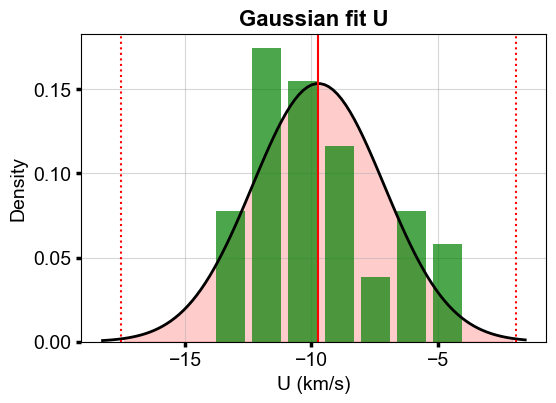

In [60]:
# Componente U

from scipy.stats import norm
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord
import pandas as pd
import numpy as np

df=pd.read_csv('VCA_MCM.csv')

mean = np.mean(df["U"])
std = np.std(df["U"])

plt.figure(figsize=(6,4))
# Plot the histogram
plt.hist(df['U'], bins='auto', density=True, alpha=0.7, color='green', zorder=2, rwidth=0.8)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin-4, xmax+2, 100)
p = norm.pdf(x, mean, std)
low = mean - 3*std
hight = mean + 3*std

plt.plot(x, p, 'k', lw=2, label='Gaussian fit')
plt.axvline(x = mean, color = 'r', label = 'μ')
plt.axvline(x = mean - 3*std, color = 'red', linestyle='dotted',label = '±3σ')
plt.axvline(x = mean + 3*std, color = 'red', linestyle='dotted')

# Slice the data on ±3σ
plt.fill_between(x, p, where=(low < x)&(x < hight), alpha=0.2, color='red')

plt.xlabel("U (km/s)")
plt.ylabel("Density")
plt.title('Gaussian fit U',fontsize = 16, fontweight='bold')
#plt.legend(shadow=True,loc=7,bbox_to_anchor=(1.47, 0.5))
plt.grid("on")

# Salvando a figura
#plt.savefig('gauss_U.png', dpi=600)
plt.show()

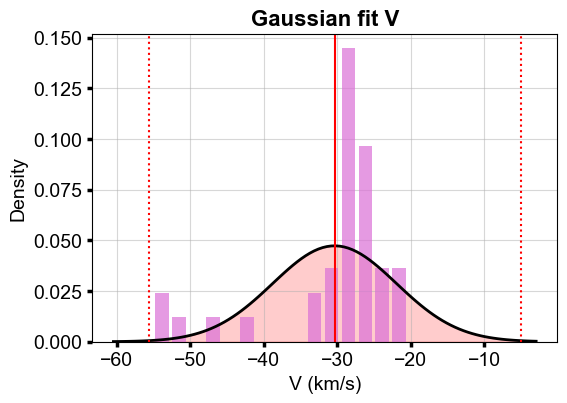

In [61]:
# Componente V

from scipy.stats import norm
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord
import pandas as pd
import numpy as np

df=pd.read_csv('VCA_MCM.csv')

mean = np.mean(df["V"])
std = np.std(df["V"])

plt.figure(figsize=(6,4))
# Plot the histogram
plt.hist(df['V'], bins='auto', density=True, alpha=0.7, color='orchid', zorder=2, rwidth=0.8)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin-4, xmax+16, 100)
p = norm.pdf(x, mean, std)
low = mean - 3*std
hight = mean + 3*std

plt.plot(x, p, 'k', lw=2, label='Gaussian fit')
plt.axvline(x = mean, color = 'r', label = 'μ')
plt.axvline(x = mean - 3*std, color = 'red', linestyle='dotted',label = '±3σ')
plt.axvline(x = mean + 3*std, color = 'red', linestyle='dotted')

# Slice the data on ±3σ
plt.fill_between(x, p, where=(low < x)&(x < hight), alpha=0.2, color='red')

plt.xlabel("V (km/s)")
plt.ylabel("Density")
plt.title('Gaussian fit V',fontsize = 16, fontweight='bold')
#plt.legend(shadow=True,loc=7,bbox_to_anchor=(1.47, 0.5))
plt.grid("on")

#plt.savefig('gauss_V.png', dpi=600)
plt.show()

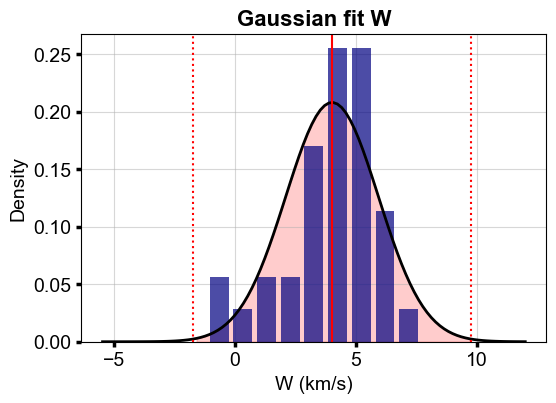

In [62]:
# Componente W

from scipy.stats import norm
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS, Galactic, SkyCoord
import pandas as pd
import numpy as np

df=pd.read_csv('VCA_MCM.csv')

mean = np.mean(df["W"])
std = np.std(df["W"])

plt.figure(figsize=(6,4))
# Plot the histogram
plt.hist(df['W'], bins='auto', density=True, alpha=0.7, color='navy', zorder=2, rwidth=0.8)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin-4, xmax+4, 100)
p = norm.pdf(x, mean, std)
low = mean - 3*std
hight = mean + 3*std

plt.plot(x, p, 'k', lw=2, label='Gaussian fit')
plt.axvline(x = mean, color = 'r', label = 'μ')
plt.axvline(x = mean - 3*std, color = 'red', linestyle='dotted',label = '±3σ')
plt.axvline(x = mean + 3*std, color = 'red', linestyle='dotted')

# Slice the data on ±3σ
plt.fill_between(x, p, where=(low < x)&(x < hight), alpha=0.2, color='red')

plt.xlabel("W (km/s)")
plt.ylabel("Density")
plt.title('Gaussian fit W',fontsize = 16, fontweight='bold')
#plt.legend(shadow=True,loc=7,bbox_to_anchor=(1.47, 0.5))
plt.grid("on")

#plt.savefig('gauss_W.png', dpi=600)
plt.show()

<a id='9'></a>

>  ### Robust Mahalonibis Distance (MCD)
---

### Parallax, PMRA e PMDEC

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from scipy.stats import chi2
from matplotlib import patches
from matplotlib.patches import Ellipse

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df= pd.read_csv('VCA_MCM.csv', sep=",", decimal='.' )
df.head()

df = df[['parallax', 'pmra', 'pmdec']]
df = df.dropna()
df = df.to_numpy()

X = np.asarray(df)

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)

# imprime a matriz MCD Robusta
print("Matrix de Covariância Extimada:\nMCD (Robust):\n{}".format(
        robust_cov.covariance_))

# Covariance matrix power of -1 Robusta
covariance_pm1 = np.linalg.matrix_power(robust_cov.covariance_, -1)

centerpoint = np.mean(X , axis=0)

# Calcule as distâncias de Mahalanobis com base na matriz de covariância inversa
#Dˆ2 é a raiz quadrada da dist de mahanalobis (retorna o mesmo valor do calculado pela Sabrina)
mahalanobis_distance = [(np.dot(np.dot((x - centerpoint).T, covariance_pm1),
                                (x - centerpoint))) for x in X]
mahalanobis_distances = np.array(mahalanobis_distance)
#print(f"Distâncias de Mahalanobis com base no MCD: {mahalanobis_distances}")

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.975, df.shape[1])

# Index of outliers
outliers = np.where(mahalanobis_distances > (chi2.ppf(0.975, df.shape[1])))

# Index of inliers
inliers = np.where(mahalanobis_distances <= (chi2.ppf(0.975, df.shape[1])))

print('--- Index of Outliers ----')
print(outliers)
#print('--- Index of Inliers---')
#print(inliers)

Matrix de Covariância Extimada:
MCD (Robust):
[[ 0.15698653 -1.40356067  0.3072847 ]
 [-1.40356067 33.22255134  6.88598664]
 [ 0.3072847   6.88598664 11.85862627]]
--- Index of Outliers ----
(array([ 5,  7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62]),)


---
## Analise 2D e plot's
---

### <span style='color:blue'>**Parallax vs PMRA**</span>

--- Index of Outliers ----
(array([ 5,  7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62]),)


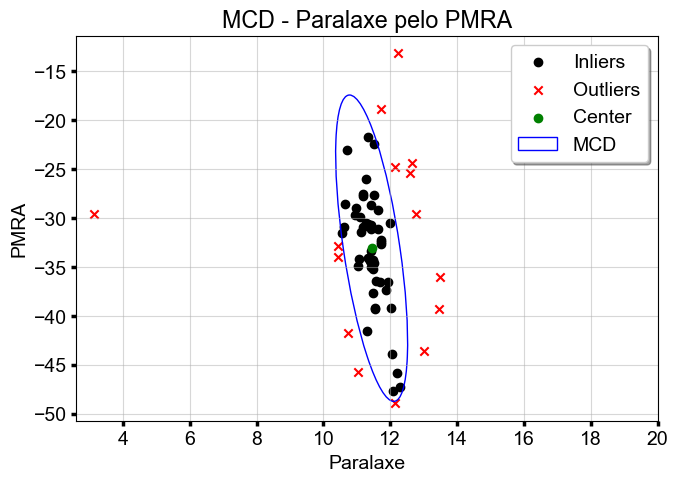

Objetos dentro da elipse: 48


In [64]:
###############################################################################
# Display results

import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df = df[['parallax', 'pmra']]
df = df.dropna()
df = df.to_numpy()
X = np.asarray(df)

robust_cov = MinCovDet().fit(X)
covariance_pm1 = np.linalg.inv(robust_cov.covariance_)
centerpoint = np.mean(df, axis=0)

mahalanobis_distance = [(np.dot(np.dot((x - centerpoint).T, covariance_pm1),
                                (x - centerpoint))) for x in X]
mahalanobis_distances = np.array(mahalanobis_distance)
cutoff = chi2.ppf(0.975, df.shape[1])
outliers = np.where(mahalanobis_distances > (chi2.ppf(0.975, df.shape[1])))
inliers = np.where(mahalanobis_distances <= (chi2.ppf(0.975, df.shape[1])))
print('--- Index of Outliers ----')
print(outliers)

fig, ax = plt.subplots(figsize=(7.5, 5))
#plt.figure(figsize=(6.5,4))

inlier_plot = ax.scatter(X[inliers, 0], X[inliers, 1], color="black", label="Inliers")
outlier_plot = ax.scatter(X[outliers, 0], X[outliers, 1], color="red", marker="x", label="Outliers")
center_plot = ax.scatter(centerpoint[0], centerpoint[1], color="green", marker="o", label="Center")
ax.set_xlim(ax.get_xlim()[0], 20.0)
ax.set_title("MCD - Paralaxe pelo PMRA")
ax.set_xlabel("Paralaxe")
ax.set_ylabel("PMRA")

# Calculate ellipse parameters
mean_centered = X[inliers] - centerpoint
covariance_matrix = np.cov(mean_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(robust_cov.covariance_)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
width, height = 2 * np.sqrt(cutoff * eigenvalues)

# Create ellipse patch
ellipse = patches.Ellipse(centerpoint, width, height, angle=angle, edgecolor='blue', facecolor='none', linestyle='-',label="MCD")
ax.add_patch(ellipse)
plt.legend(shadow=True)
plt.grid("on")

#plt.savefig('mcd_parallax_pmra.png', dpi=600)
plt.show()

print('Objetos dentro da elipse:', len(inliers[0]))

### <span style='color:blue'>**Parallax vs PMDEC**</span>

--- Index of Outliers ----
(array([ 7, 14, 21, 24, 26, 31, 45, 50, 62]),)


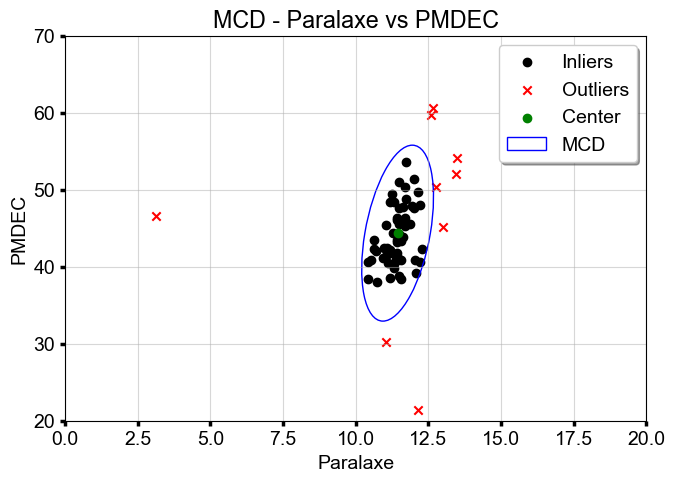

Objetos dentro da elipse: 54


In [65]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df_clean = df[['parallax', 'pmdec', '2MASS_ID_J']].dropna()

# Transform to numpy array for processing
X = df_clean[['parallax', 'pmdec']].to_numpy()

# Fit the robust covariance model
robust_cov = MinCovDet().fit(X)
covariance_pm1 = np.linalg.inv(robust_cov.covariance_)
centerpoint = np.mean(X, axis=0)

# Calculate Mahalanobis distance
mahalanobis_distances = np.array([
    np.dot(np.dot((x - centerpoint).T, covariance_pm1), (x - centerpoint))
    for x in X
])
cutoff = chi2.ppf(0.975, X.shape[1])

# Determine outliers and inliers
outliers = np.where(mahalanobis_distances > cutoff)
inliers = np.where(mahalanobis_distances <= cutoff)

# Print indices of outliers
print('--- Index of Outliers ----')
print(outliers)

# Plotting
fig, ax = plt.subplots(figsize=(7.5, 5))
inlier_plot = ax.scatter(X[inliers, 0], X[inliers, 1], color="black", label="Inliers")
outlier_plot = ax.scatter(X[outliers, 0], X[outliers, 1], color="red", marker="x", label="Outliers")
center_plot = ax.scatter(centerpoint[0], centerpoint[1], color="green", marker="o", label="Center")

ax.set_xlim([0, 20])
ax.set_ylim([20, 70])
ax.set_title("MCD - Paralaxe vs PMDEC")
ax.set_xlabel("Paralaxe")
ax.set_ylabel("PMDEC")

# Calculate ellipse parameters
eigenvalues, eigenvectors = np.linalg.eig(robust_cov.covariance_)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
width, height = 2 * np.sqrt(cutoff * eigenvalues)

# Create ellipse patch
ellipse = patches.Ellipse(centerpoint, width, height, angle=angle, edgecolor='blue', facecolor='none', linestyle='-', label="MCD")
ax.add_patch(ellipse)

plt.legend(loc="upper right", shadow=True)
plt.grid("on")
plt.savefig('mcd_parallax_pmdec.png', dpi=600)
plt.show()

# Print number of inliers
print('Objetos dentro da elipse:', len(inliers[0]))

# Print the "2MASS_ID_J" column for the outliers
#outliers_2MASS_ID_J = df_clean.iloc[outliers]['2MASS_ID_J']
#print('2MASS_ID_J dos outliers:')
#print(outliers_2MASS_ID_J)

### <span style='color:blue'>**PMRA vs PMDEC**</span>

--- Index of Outliers ----
(array([ 4,  5, 14, 19, 21, 24, 31, 45, 60, 61, 62]),)


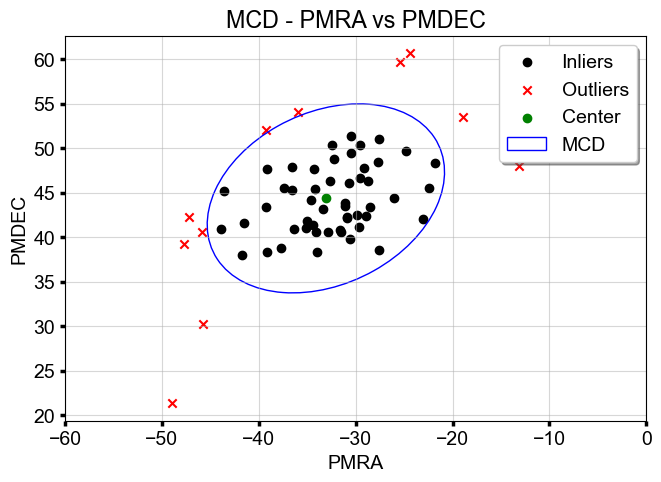

Objetos dentro da elipse: 52


In [66]:
###############################################################################
# Display results

import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df = df[['pmra', 'pmdec']]
df = df.dropna()
df = df.to_numpy()
X = np.asarray(df)

robust_cov = MinCovDet().fit(X)
covariance_pm1 = np.linalg.inv(robust_cov.covariance_)
centerpoint = np.mean(df, axis=0)

mahalanobis_distance = [(np.dot(np.dot((x - centerpoint).T, covariance_pm1),
                                (x - centerpoint))) for x in X]
mahalanobis_distances = np.array(mahalanobis_distance)
cutoff = chi2.ppf(0.975, df.shape[1])
outliers = np.where(mahalanobis_distances > (chi2.ppf(0.975, df.shape[1])))
inliers = np.where(mahalanobis_distances <= (chi2.ppf(0.975, df.shape[1])))

print('--- Index of Outliers ----')
print(outliers)

fig, ax = plt.subplots(figsize=(7.5, 5))

inlier_plot = ax.scatter(X[inliers, 0], X[inliers, 1], color="black", label="Inliers")
outlier_plot = ax.scatter(X[outliers, 0], X[outliers, 1], color="red", marker="x", label="Outliers")
center_plot = ax.scatter(centerpoint[0], centerpoint[1], color="green", marker="o", label="Center")
ax.set_xlim(ax.get_xlim()[0], 20.0)
ax.set_title("MCD - PMRA vs PMDEC")
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
ax.set_xlim(-60, 0)

# Calculate ellipse parameters
mean_centered = X[inliers] - centerpoint
covariance_matrix = np.cov(mean_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(robust_cov.covariance_)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
width, height = 2 * np.sqrt(cutoff * eigenvalues)

# Create ellipse patch
ellipse = patches.Ellipse(centerpoint, width, height, angle=angle, edgecolor='blue', facecolor='none', linestyle='-',label="MCD")
ax.add_patch(ellipse)
plt.legend(shadow=True)
plt.grid("on")

plt.savefig('mcd_pmra_pmdec.png', dpi=600)
plt.show()

print('Objetos dentro da elipse:', len(inliers[0]))

In [67]:
# Position of the Outlier (analise com os 3 parametros juntos)
# 5, 7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62 (15 estrelas)
# Import dataset and clean it

# 52 foi excluido com o 3 sigmas (duplamente outlier)
import pandas as pd

# Importar a tabela VCA_MCM
df = pd.read_csv("VCA_MCM.csv")

# Índices dos quais queremos extrair a coluna 2_MASS_ID_J
indices = [5, 7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62]

# Extrair a coluna 2_MASS_ID_J para os índices especificados e adicionar "2MASS J" na frente de cada entrada
resultados = ["2MASS J" + str(df.loc[i, "2MASS_ID_J"]) for i in indices]

# Printar os resultados
for resultado in resultados:
    print(resultado)


2MASS J08264964-6346369
2MASS J09481924-6403217
2MASS J10223868-5847599
2MASS J08383351-6716368
2MASS J08511579-7140152
2MASS J08524155-6401229
2MASS J08544569-7055078
2MASS J09040687-6325337
2MASS J09191188-6640123
2MASS J09312193-6419239
2MASS J09345645-6459579
2MASS J09374003-6226201
2MASS J09384522-6651326
2MASS J09575077-6415362
2MASS J10101695-6616006


### Velocidades: U, V e W

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from scipy.stats import chi2
from matplotlib import patches
from matplotlib.patches import Ellipse

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df= pd.read_csv('VCA_MCM.csv', sep=",", decimal='.' )
df.head()

df = df[['U', 'V', 'W']]
df = df.dropna()
df = df.to_numpy()

X = np.asarray(df)

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)

# imprime a matriz MCD Robusta
print("Matrix de Covariância Extimada:\nMCD (Robust):\n{}".format(
        robust_cov.covariance_))

# Covariance matrix power of -1 Robusta
covariance_pm1 = np.linalg.matrix_power(robust_cov.covariance_, -1)

centerpoint = np.mean(X , axis=0)

# Calcule as distâncias de Mahalanobis com base na matriz de covariância inversa
#Dˆ2 é a raiz quadrada da dist de mahanalobis (retorna o mesmo valor do calculado pela Sabrina)
mahalanobis_distance = [(np.dot(np.dot((x - centerpoint).T, covariance_pm1),
                                (x - centerpoint))) for x in X]
mahalanobis_distances = np.array(mahalanobis_distance)
#print(f"Distâncias de Mahalanobis com base no MCD: {mahalanobis_distances}")

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.975, df.shape[1])

# Index of outliers
outliers = np.where(mahalanobis_distances > (chi2.ppf(0.975, df.shape[1])))

# Index of inliers
inliers = np.where(mahalanobis_distances <= (chi2.ppf(0.975, df.shape[1])))

print('--- Index of Outliers ----')
print(outliers)


Matrix de Covariância Extimada:
MCD (Robust):
[[ 2.34933577 -0.47983021  0.50595872]
 [-0.47983021  5.82210001  1.12529551]
 [ 0.50595872  1.12529551  0.5674678 ]]
--- Index of Outliers ----
(array([ 0,  5,  8, 12, 14, 16, 22, 25, 27, 29, 30, 32, 33, 34]),)


In [69]:
# Position of the Outlier (analise com os 3 parametros juntos)
# 0,  5,  8, 12, 14, 16, 22, 25, 27, 29, 30, 32, 33, 34 (14 estrelas)
# Import dataset and clean it

import pandas as pd

# Importar a tabela VCA_MCM
df = pd.read_csv("VCA_MCM.csv")

# Índices dos quais queremos extrair a coluna 2_MASS_ID_J
indices_vel = [0,  5,  8, 12, 14, 16, 22, 25, 27, 29, 30, 32, 33, 34]

# Extrair a coluna 2_MASS_ID_J para os índices especificados e adicionar "2MASS J" na frente de cada entrada
resultados_vel = ["2MASS J" + str(df.loc[i, "2MASS_ID_J"]) for i in indices_vel]

# Printar os resultados
for resultado in resultados_vel:
    print(resultado)


2MASS J08550282-6038406
2MASS J08264964-6346369
2MASS J10082200-6756402
2MASS J09263145-6236236
2MASS J10223868-5847599
2MASS J09311626-6414270
2MASS J08524066-6552278
2MASS J08555655-6146057
2MASS J09090086-6826022
2MASS J09133635-6522114
2MASS J09181573-6310540
2MASS J09202620-6329547
2MASS J09221992-6756519
2MASS J09223111-6206070


---
## Analise 2D e plot's
---

In [70]:
### U vs V 

--- Index of Outliers ----
(array([ 8, 12, 14, 16, 22, 25, 27, 29, 30, 33, 34]),)


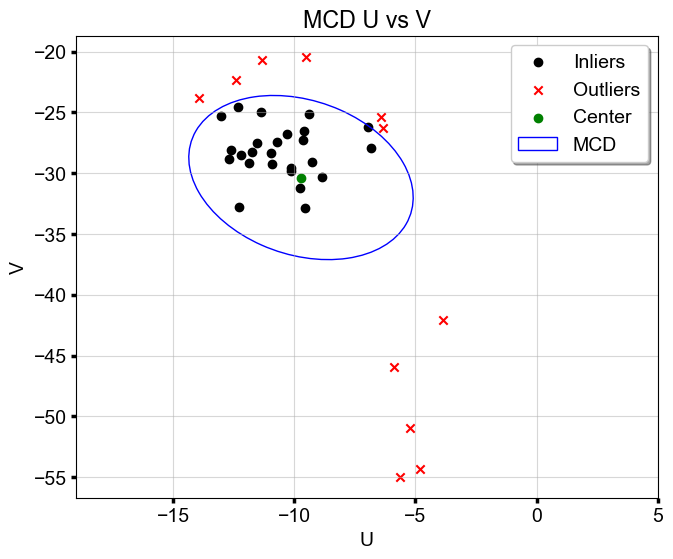

Objetos dentro da elipse: 25


In [71]:
###############################################################################
# Display results

import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df = df[['U', 'V']]
df = df.dropna()
df = df.to_numpy()
X = np.asarray(df)

robust_cov = MinCovDet().fit(X)
covariance_pm1 = np.linalg.inv(robust_cov.covariance_)
centerpoint = np.mean(df, axis=0)

mahalanobis_distance = [(np.dot(np.dot((x - centerpoint).T, covariance_pm1),
                                (x - centerpoint))) for x in X]
mahalanobis_distances = np.array(mahalanobis_distance)
cutoff = chi2.ppf(0.975, df.shape[1])
outliers = np.where(mahalanobis_distances > (chi2.ppf(0.975, df.shape[1])))
inliers = np.where(mahalanobis_distances <= (chi2.ppf(0.975, df.shape[1])))

print('--- Index of Outliers ----')
print(outliers)

fig, ax = plt.subplots(figsize=(7.5, 6))

inlier_plot = ax.scatter(X[inliers, 0], X[inliers, 1], color="black", label="Inliers")
outlier_plot = ax.scatter(X[outliers, 0], X[outliers, 1], color="red", marker="x", label="Outliers")
center_plot = ax.scatter(centerpoint[0], centerpoint[1], color="green", marker="o", label="Center")
ax.set_xlim(ax.get_xlim()[0], 20.0)
ax.set_title("MCD U vs V")
ax.set_xlabel("U")
ax.set_ylabel("V")
ax.set_xlim(-19, 5)

# Calculate ellipse parameters
mean_centered = X[inliers] - centerpoint
covariance_matrix = np.cov(mean_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(robust_cov.covariance_)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
width, height = 2 * np.sqrt(cutoff * eigenvalues)

# Create ellipse patch
ellipse = patches.Ellipse(centerpoint, width, height, angle=angle, edgecolor='blue', facecolor='none', linestyle='-',label="MCD")
ax.add_patch(ellipse)
plt.legend(shadow=True)
plt.grid("on")

plt.savefig('mcd_uv.png', dpi=600)
plt.show()

print('Objetos dentro da elipse:', len(inliers[0]))

### U vs W

--- Index of Outliers ----
(array([ 0,  5, 12, 14, 16, 22, 25, 27, 29, 33, 34]),)


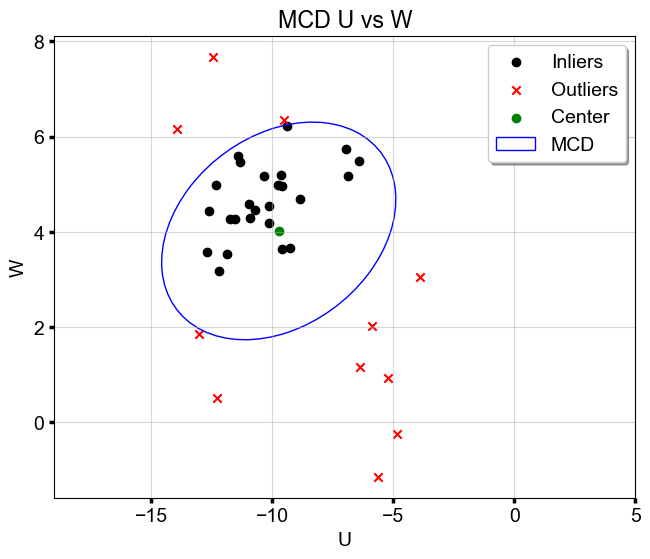

Objetos dentro da elipse: 25


In [72]:
###############################################################################
# Display results

import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df = df[['U', 'W']]
df = df.dropna()
df = df.to_numpy()
X = np.asarray(df)

robust_cov = MinCovDet().fit(X)
covariance_pm1 = np.linalg.inv(robust_cov.covariance_)
centerpoint = np.mean(df, axis=0)

mahalanobis_distance = [(np.dot(np.dot((x - centerpoint).T, covariance_pm1),
                                (x - centerpoint))) for x in X]
mahalanobis_distances = np.array(mahalanobis_distance)
cutoff = chi2.ppf(0.975, df.shape[1])
outliers = np.where(mahalanobis_distances > (chi2.ppf(0.975, df.shape[1])))
inliers = np.where(mahalanobis_distances <= (chi2.ppf(0.975, df.shape[1])))

print('--- Index of Outliers ----')
print(outliers)

fig, ax = plt.subplots(figsize=(7.5, 6))

inlier_plot = ax.scatter(X[inliers, 0], X[inliers, 1], color="black", label="Inliers")
outlier_plot = ax.scatter(X[outliers, 0], X[outliers, 1], color="red", marker="x", label="Outliers")
center_plot = ax.scatter(centerpoint[0], centerpoint[1], color="green", marker="o", label="Center")
ax.set_xlim(ax.get_xlim()[0], 20.0)
ax.set_title("MCD U vs W")
ax.set_xlabel("U")
ax.set_ylabel("W")
ax.set_xlim(-19, 5)

# Calculate ellipse parameters
mean_centered = X[inliers] - centerpoint
covariance_matrix = np.cov(mean_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(robust_cov.covariance_)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
width, height = 2 * np.sqrt(cutoff * eigenvalues)

# Create ellipse patch
ellipse = patches.Ellipse(centerpoint, width, height, angle=angle, edgecolor='blue', facecolor='none', linestyle='-',label="MCD")
ax.add_patch(ellipse)
plt.legend(shadow=True)
plt.grid("on")

plt.savefig('mcd_uw.png', dpi=600)
plt.show()

print('Objetos dentro da elipse:', len(inliers[0]))

### V vs W

--- Index of Outliers ----
(array([ 0,  5, 12, 14, 16, 21, 22, 25, 27, 29, 30, 33, 34]),)


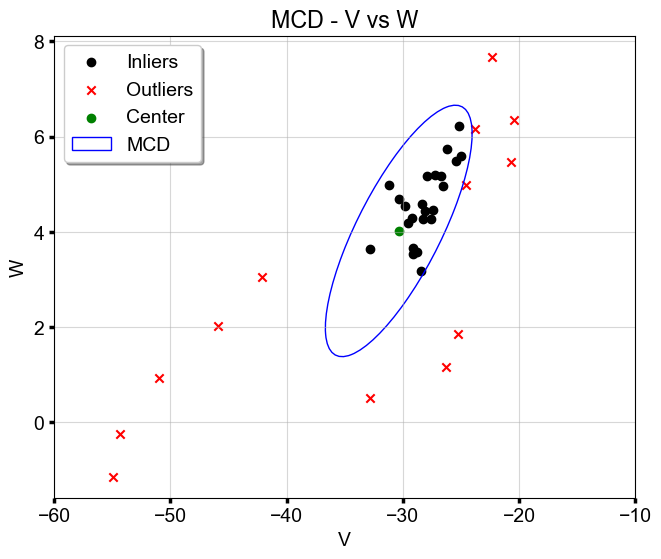

Objetos dentro da elipse: 23


In [73]:
###############################################################################
# Display results

import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches

# Import dataset and clean it
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df = df[['V', 'W']]
df = df.dropna()
df = df.to_numpy()
X = np.asarray(df)

robust_cov = MinCovDet().fit(X)
covariance_pm1 = np.linalg.inv(robust_cov.covariance_)
centerpoint = np.mean(df, axis=0)

mahalanobis_distance = [(np.dot(np.dot((x - centerpoint).T, covariance_pm1),
                                (x - centerpoint))) for x in X]
mahalanobis_distances = np.array(mahalanobis_distance)
cutoff = chi2.ppf(0.975, df.shape[1])
outliers = np.where(mahalanobis_distances > (chi2.ppf(0.975, df.shape[1])))
inliers = np.where(mahalanobis_distances <= (chi2.ppf(0.975, df.shape[1])))

print('--- Index of Outliers ----')
print(outliers)

fig, ax = plt.subplots(figsize=(7.5, 6))

inlier_plot = ax.scatter(X[inliers, 0], X[inliers, 1], color="black", label="Inliers")
outlier_plot = ax.scatter(X[outliers, 0], X[outliers, 1], color="red", marker="x", label="Outliers")
center_plot = ax.scatter(centerpoint[0], centerpoint[1], color="green", marker="o", label="Center")
ax.set_xlim(ax.get_xlim()[0], 20.0)
ax.set_title("MCD - V vs W")
ax.set_xlabel("V")
ax.set_ylabel("W")
ax.set_xlim(-60, -10)

# Calculate ellipse parameters
mean_centered = X[inliers] - centerpoint
covariance_matrix = np.cov(mean_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(robust_cov.covariance_)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
width, height = 2 * np.sqrt(cutoff * eigenvalues)

# Create ellipse patch
ellipse = patches.Ellipse(centerpoint, width, height, angle=angle, edgecolor='blue', facecolor='none', linestyle='-',label="MCD")
ax.add_patch(ellipse)
plt.legend(shadow=True)
plt.grid("on")

plt.savefig('mcd_vw.png', dpi=600)
plt.show()

print('Objetos dentro da elipse:', len(inliers[0]))

In [74]:
# Position of the Outlier
# 5, 14, 19, 21, 24, 62 (6 estrelas) parallax, pm's

# 12, 14, 16, 22, 25, 27, 29, 33, 34 (9 estrelas)

# Import dataset 
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)

# 52 foi excluido com o 3 sigmas

print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][12]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][14]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][16]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][22]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][25]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][27]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][29]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][33]))
print("Identificador: 2MASS J{Name}".format(Name=df["2MASS_ID_J"][34]))

Identificador: 2MASS J09263145-6236236
Identificador: 2MASS J10223868-5847599
Identificador: 2MASS J09311626-6414270
Identificador: 2MASS J08524066-6552278
Identificador: 2MASS J08555655-6146057
Identificador: 2MASS J09090086-6826022
Identificador: 2MASS J09133635-6522114
Identificador: 2MASS J09221992-6756519
Identificador: 2MASS J09223111-6206070


(array([ 0,  5,  8, 12, 14, 16, 22, 25, 27, 29, 30, 32, 33, 34]),) (velocidades)  
(array([ 8,     12, 14, 16, 22, 25, 27, 29, 30, 33, 34]),) (UV)  
(array([ 0,  5, 12, 14, 16, 22, 25, 27, 29, 33, 34]),) (UW)  
(array([ 0,  5, 12, 13, 14, 16, 21, 22, 25, 26, 27, 29, 30, 33, 34]),) (VW)  

Em comum: 12, 14, 16, 22, 25, 27, 29, 33, 34 (9 estrelas)

(array([ 5,  7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62]),)(parallax, pmra, pmdec)  
(array([ 5,  7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62]),)(parallax,pmra)  
(array([ 5,  7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62]),)(parallac,pmdec)  
(array([ 4,  5, 14, 19, 21, 24, 60, 61, 62]),) (para,pmdec)

Em comum: 5, 14, 19, 21, 24, 62 (6 estrelas)

(array([ 0,  5,  8, 12, 14, 16, 22, 25, 27, 29, 30, 32, 33, 34]),) (velocidades)  
(array([ 5,  7, 14, 19, 21, 23, 24, 26, 31, 45, 50, 52, 53, 58, 62]),)(parallax, pmra, pmdec)

Em comum: 5, 14

<a id='10'></a>

>  ### Idade
---

#### Diagrama cor-magnitude

Cor: phot_g_mean_mag - phot_rp_mean_mag  
Magnitude: phot_g_mean_mag ou o corrigido mag_abs_g. 

Aqui a gente tá convertendo o arquivo do gaia, para cada objeto estamos calculando a magnitude absoluta.  

**Magnitude absoluta:** phot_g_mean_mag -5*log10(1000/parallax) + 5  

\begin{equation}
M = m - log(dis_{pc}) + 5 
\end{equation}  

**Modelos isócronas:** 

- [BHAC15](http://perso.ens-lyon.fr/isabelle.baraffe/BHAC15dir/)  
BHAC15_iso.GAIA (arquivo p/ selecionar as isócronas desse modelo). 

- [Parsec isochrones](http://stev.oapd.inaf.it/cgi-bin/cmd)  
Configurações:  
Photometric system: Gaia EDR3  
Ages/metallicities: colocar um intervalo de tempo para isócrona pode ser o mesmo selecionado no outro modelo.

<a id='10.1'></a>
### <span style='color:blue'>**BHAC15 - Metódo: Isócronas**</span>

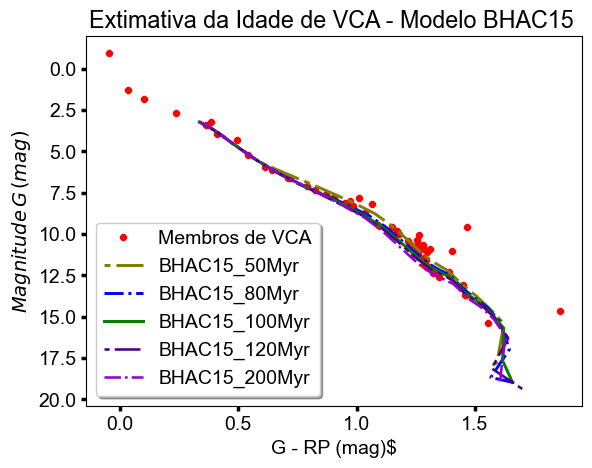

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df_50 = pd.read_csv("bcah15_50myr.csv")
df_80 = pd.read_csv("bcah15_80myr.csv")
df_100 = pd.read_csv("bcah15_100myr.csv")
df_120 = pd.read_csv("bcah15_120myr.csv")
df_200 = pd.read_csv("bcah15_200myr.csv")
# Filtros:
phot_g = df['phot_g_mean_mag']
phot_bp = df['phot_bp_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# BHAC15_50myr
G_50 = df_50['G']
G_RP_50 = df_50['G_RP']
# BHAC15_80myr
G_80 = df_80['G']
G_RP_80 = df_80['G_RP']
# BHAC15_100myr
G_100 = df_100['G']
G_RP_100 = df_100['G_RP']
# BHAC15_120myr
G_120 = df_120['G']
G_RP_120 = df_120['G_RP']
# BHAC15_120myr
G_200 = df_200['G']
G_RP_200 = df_200['G_RP']

# Mag abs
mag_abs_g = df['mag_abs_g']

# MODELO BHAC15
# 1Gyr = 10^9
# Plots

plt.plot((phot_g - phot_rp), mag_abs_g, "8", ms=4, color='red',label='Membros de VCA')
line1, = plt.plot((G_50 - G_RP_50), G_50, "--", linewidth=2.15, color='olive',label='BHAC15_50Myr')
line1.set_dashes([2, 2, 10, 2])
line2, = plt.plot((G_80 - G_RP_80), G_80, ls='dashdot', linewidth=2.15, color='blue',label='BHAC15_80Myr')
#line2.set_dashes([2, 2, 10, 2])
line3, = plt.plot((G_100 - G_RP_100), G_100, ls='solid', linewidth=2.15, color='green',label='BHAC15_100Myr')
line4, = plt.plot((G_120 - G_RP_120), G_120, "--", linewidth=1.85, color='indigo',label='BHAC15_120Myr')
line4.set_dashes([2, 2, 10, 2])
line5, = plt.plot((G_200 - G_RP_200), G_200, '-.', linewidth=1.85, color='darkviolet',label='BHAC15_200Myr')
plt.gca().invert_yaxis()  # Inverter o eixo y
plt.xlabel('G - RP (mag)$')  # Nome do eixo x
plt.ylabel('$Magnitude \, G\, (mag)$')  # Nome do eixo y
plt.title('Extimativa da Idade de VCA - Modelo BHAC15 ')  # Título do gráfico
plt.legend(shadow=True)
plt.savefig('idades_BHAC15.png',dpi=600,facecolor='w')
plt.show()



##### Melhores Fit's

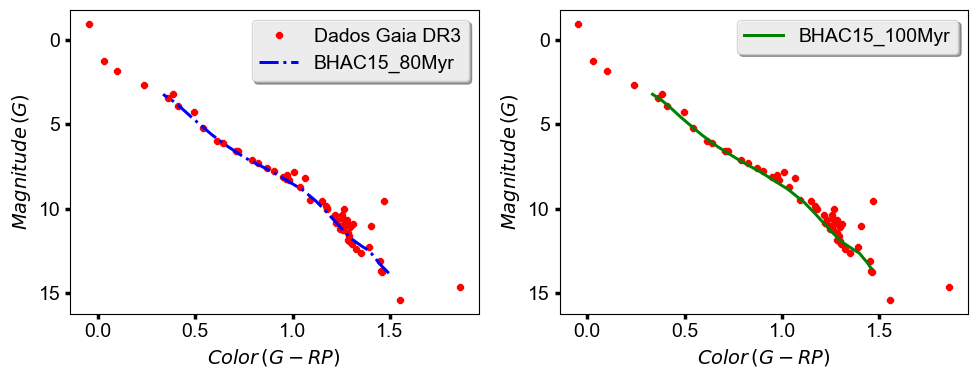

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df_80 = pd.read_csv("bcah15_80myr.csv")
df_100 = pd.read_csv("bcah15_100myr.csv")

# Filtros
phot_g = df['phot_g_mean_mag']
phot_bp = df['phot_bp_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# BHAC15_80myr
G_80 = df_80['G']
G_RP_80 = df_80['G_RP']
# BHAC15_100myr
G_100 = df_100['G']
G_RP_100 = df_100['G_RP']

# Mag abs
mag_abs_g = df['mag_abs_g']

# Criar figura e eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotar pontos e linha 2 no axes 1
ax1.plot((phot_g - phot_rp), mag_abs_g, "8", ms=4, color='red', label='Dados Gaia DR3')
line2, = ax1.plot((G_80 - G_RP_80)[5:], G_80[5:], ls='dashdot', linewidth=2.15, color='blue', label='BHAC15_80Myr')

# Configurar eixos 1
ax1.invert_yaxis()  # Inverter o eixo y
ax1.set_xlabel('$Color \,(G - RP)$')  # Nome do eixo x
ax1.set_ylabel('$Magnitude \,(G)$')
ax1.legend()

# Plotar pontos e linha 3 no axes 2
ax2.plot((phot_g - phot_rp), mag_abs_g, "8", ms=4, color='red')
line3, = ax2.plot((G_100 - G_RP_100)[5:], G_100[5:], ls='solid', linewidth=2.15, color='green', label='BHAC15_100Myr')

# Configurar eixos 2
ax2.invert_yaxis()  # Inverter o eixo y
ax2.set_xlabel('$Color \,(G - RP)$')  # Nome do eixo x
ax2.set_ylabel('$Magnitude \,(G)$')

# Exibir a legenda para a linha 3
ax2.legend([line3], [line3.get_label()])

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


<a id='10.2'></a>
### <span style='color:blue'>**Parsec - Metódo: Isócronas**</span>

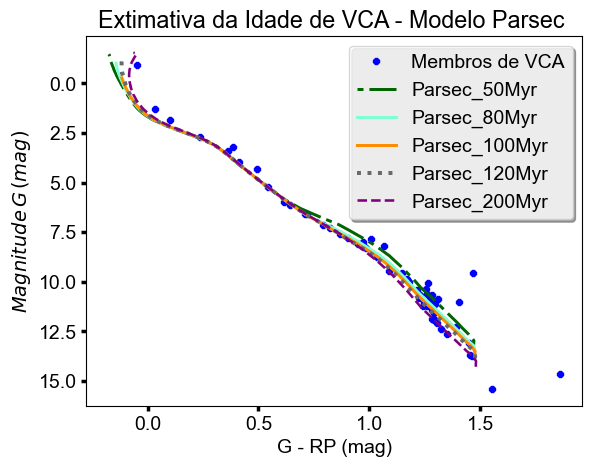

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df_50 = pd.read_csv("parsec_50myr.csv")
df_80 = pd.read_csv("parsec_80myr.csv")
df_100 = pd.read_csv("parsec_100myr.csv")
df_120 = pd.read_csv("parsec_120myr.csv")
df_200 = pd.read_csv("parsec_200myr.csv")

# Filtros
phot_g = df['phot_g_mean_mag']
phot_bp = df['phot_bp_mean_mag']
phot_rp = df['phot_rp_mean_mag']
# Mag abs
mag_abs_g = df['mag_abs_g']

# Parsec_50myr
G_50 = df_50['Gmag']
G_RP_50 = df_50['G_RPmag']
# Parsec_80myr
G_80 = df_80['Gmag']
G_RP_80 = df_80['G_RPmag']
# Parsec_100myr
G_100 = df_100['Gmag']
G_RP_100 = df_100['G_RPmag']
# Parsec_120myr
G_120 = df_120['Gmag']
G_RP_120 = df_120['G_RPmag']
# Parsec_200myr
G_200 = df_200['Gmag']
G_RP_200 = df_200['G_RPmag']

# Plot's
plt.plot((phot_g - phot_rp), mag_abs_g, "8", ms=5, color='blue',label='Membros de VCA')
line1, = plt.plot((G_50[:-220] - G_RP_50[:-220]), G_50[:-220], "--", linewidth=2.15, color='darkgreen', label='Parsec_50Myr')
line1.set_dashes([2, 2, 10, 2])
line2, = plt.plot((G_80[:-380] - G_RP_80[:-380]), G_80[:-380], ls='solid', linewidth=2.15, color='aquamarine',label='Parsec_80Myr')
line3, = plt.plot((G_100[:-380] - G_RP_100[:-380]), G_100[:-380], ls='solid', linewidth=2.15, color='darkorange',label='Parsec_100Myr')
line4, = plt.plot((G_120[:-380] - G_RP_120[:-380]), G_120[:-380], ls=':', linewidth=2.85, color='dimgrey',label='Parsec_120Myr')
line5, = plt.plot((G_200[:-340] - G_RP_200[:-340]), G_200[:-340], ls='--', linewidth=1.85, color='purple',label='Parsec_200Myr')
plt.gca().invert_yaxis()  # Inverter o eixo y
plt.xlabel('G - RP (mag)')  
plt.ylabel('$Magnitude \, G \, (mag)$')
plt.title('Extimativa da Idade de VCA - Modelo Parsec ')  
plt.legend()
plt.savefig('idades_Parsec.png',dpi=600,facecolor='w')
plt.show()



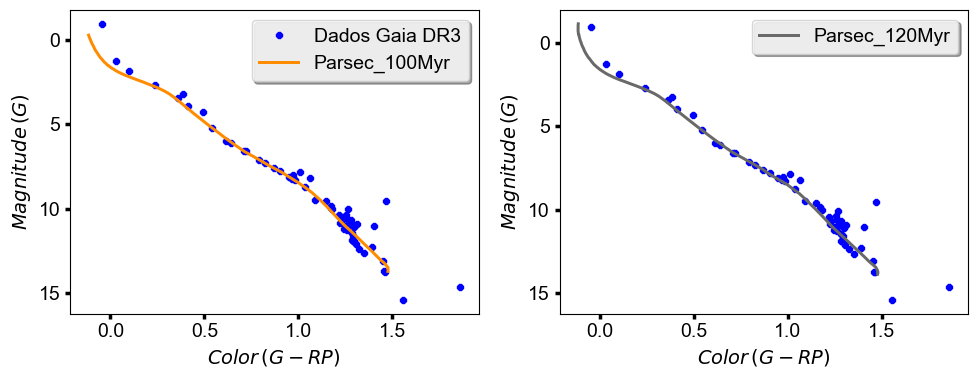

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df_100 = pd.read_csv("parsec_100myr.csv")
df_120 = pd.read_csv("parsec_120myr.csv")

# Filtros
phot_g = df['phot_g_mean_mag']
phot_bp = df['phot_bp_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# Parsec_100myr
G_100 = df_100['Gmag']
G_RP_100 = df_100['G_RPmag']
# Parsec_120myr
G_120 = df_120['Gmag']
G_RP_120 = df_120['G_RPmag']

# Mag abs
mag_abs_g = df['mag_abs_g']

# Criar figura e eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotar pontos e linha 2 no axes 1
ax1.plot((phot_g - phot_rp), mag_abs_g, "8", ms=4, color='blue', label='Dados Gaia DR3')
line2, = ax1.plot((G_100 - G_RP_100)[:-380], G_100[:-380], ls='solid', linewidth=2.15, color='darkorange', label='Parsec_100Myr')

# Configurar eixos 1
ax1.invert_yaxis()  # Inverter o eixo y
ax1.set_xlabel('$Color \,(G - RP)$')  # Nome do eixo x
ax1.set_ylabel('$Magnitude \,(G)$')  # Nome do eixo y
ax1.legend()

# Plotar pontos e linha 3 no axes 2
ax2.plot((phot_g - phot_rp), mag_abs_g, "8", ms=4, color='blue')
line3, = ax2.plot((G_120 - G_RP_120)[:-380], G_120[:-380], ls='solid', linewidth=2.15, color='dimgrey', label='Parsec_120Myr')

# Configurar eixos 2
ax2.invert_yaxis()  # Inverter o eixo y
ax2.set_xlabel('$Color \,(G - RP)$')  # Nome do eixo x
ax2.set_ylabel('$Magnitude \,(G)$')  # Nome do eixo y


# Exibir a legenda para a linha 3
ax2.legend([line3], [line3.get_label()])

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


<a id='10.3'></a>
### <span style='color:blue'>**Melhores Isócronas**</span>

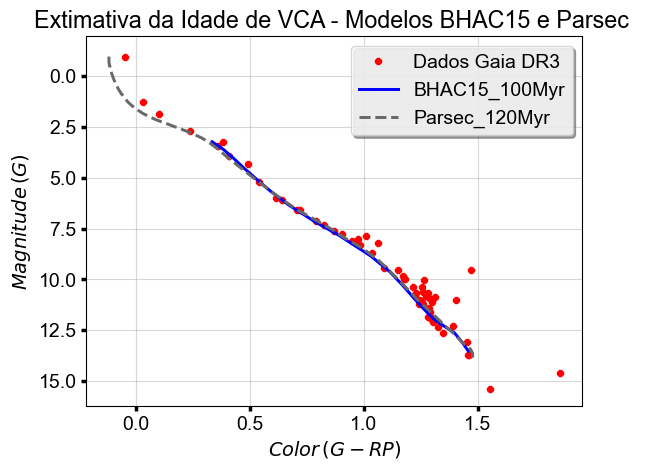

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)
df_100_B = pd.read_csv("bcah15_100myr.csv")
df_120_P = pd.read_csv("Parsec_120myr.csv")

# Filtros
phot_g = df['phot_g_mean_mag']
phot_bp = df['phot_bp_mean_mag']
phot_rp = df['phot_rp_mean_mag']
# Mag abs
mag_abs_g = df['mag_abs_g']

# BHAC15_100myr
G_100_B = df_100_B['G']
G_RP_100_B = df_100_B['G_RP']
# Parsec_120myr
G_120_P = df_120_P['Gmag']
G_RP_120_P = df_120_P['G_RPmag']

plt.plot((phot_g - phot_rp), mag_abs_g, "8", ms=5, color='red',label='Dados Gaia DR3')
line1, = plt.plot((G_100_B - G_RP_100_B)[5:], G_100_B[5:], ls='solid', linewidth=2.15, color='blue', label='BHAC15_100Myr')
line2, = plt.plot((G_120_P - G_RP_120_P)[:-380], G_120_P[:-380], ls='--', linewidth=2.15, color='dimgrey', label='Parsec_120Myr')
plt.gca().invert_yaxis()  # Inverter o eixo y
plt.xlabel('$Color \,(G - RP)$')  
plt.ylabel('$Magnitude \,(G)$') 
plt.title('Extimativa da Idade de VCA - Modelos BHAC15 e Parsec ')  
plt.legend()
plt.grid(True)

#plt.savefig('idades_BHAC15_Parsec.png',dpi=600,facecolor='w')
plt.show()




<a id='10.4'></a>
#### <span style='color:blue'>**Estimativa da idade - método: MENOR DISTÂNCIA ENTRE A CURVA E O PONTO. MODELO BHAC**</span>


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)

# Filtros:
phot_g = df['phot_g_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# Mag abs
mag_abs_g = df['mag_abs_g']

# CURVAS:
# BHAC15_50myr
df_B_50 = pd.read_csv("bcah15_50myr.csv")
G_50 = df_B_50['G']
G_RP_50 = df_B_50['G_RP']

# BHAC15_80myr
df_B_80 = pd.read_csv("bcah15_80myr.csv")
G_80 = df_B_80['G']
G_RP_80 = df_B_80['G_RP']

# BHAC15_100myr
df_B_100 = pd.read_csv("bcah15_100myr.csv")
G_100 = df_B_100['G']
G_RP_100 = df_B_100['G_RP']

# BHAC15_120myr
df_B_120 = pd.read_csv("bcah15_120myr.csv")
G_120 = df_B_120['G']
G_RP_120 = df_B_120['G_RP']

# BHAC15_200myr
df_B_200 = pd.read_csv("bcah15_200myr.csv")
G_200 = df_B_200['G']
G_RP_200 = df_B_200['G_RP']

# Convertendo as colunas em arrays numpy (par ordenado)
curve_points_50 = np.column_stack((G_50 - G_RP_50, G_50))
curve_points_80 = np.column_stack((G_80 - G_RP_80, G_80))
curve_points_100 = np.column_stack((G_100 - G_RP_100, G_100))
curve_points_120 = np.column_stack((G_120 - G_RP_120, G_120))
curve_points_200 = np.column_stack((G_200 - G_RP_200, G_200))

par_points = np.column_stack((phot_g - phot_rp, mag_abs_g))

# Calcular a distância euclidiana entre todos os pontos de par_points e todas as curvas
distancias_50 = np.min(cdist(par_points, curve_points_50, 'euclidean'), axis=1)
distancias_80 = np.min(cdist(par_points, curve_points_80, 'euclidean'), axis=1)
distancias_100 = np.min(cdist(par_points, curve_points_100, 'euclidean'), axis=1)
distancias_120 = np.min(cdist(par_points, curve_points_120, 'euclidean'), axis=1)
distancias_200 = np.min(cdist(par_points, curve_points_200, 'euclidean'), axis=1)

# Escolha um valor limite de distância para determinar quais pontos estão próximos das curvas
limite_distancia = 0.2  # Ajuste o valor conforme necessário

# Encontre os índices dos pontos que atendem à condição (distância menor ou igual ao limite) para todas as curvas
indices_proximos_50 = np.where(distancias_50 <= limite_distancia)[0]
indices_proximos_80 = np.where(distancias_80 <= limite_distancia)[0]
indices_proximos_100 = np.where(distancias_100 <= limite_distancia)[0]
indices_proximos_120 = np.where(distancias_120 <= limite_distancia)[0]
indices_proximos_200 = np.where(distancias_200 <= limite_distancia)[0]

# Determine a idade para cada ponto com base na curva mais próxima
idades = []
for i in range(len(par_points)):
    if i in indices_proximos_50:
        idades.append((i, 50))
    elif i in indices_proximos_80:
        idades.append((i, 80))
    elif i in indices_proximos_100:
        idades.append((i, 100))
    elif i in indices_proximos_120:
        idades.append((i, 120))
    elif i in indices_proximos_200:
        idades.append((i, 200))
    else:
        idades.append((i, None))

idades = np.array(idades)

# Imprimir os índices dos pontos próximos sem repetições
indices_proximos_sem_repeticao = np.unique(np.concatenate((indices_proximos_50, indices_proximos_80, indices_proximos_100, indices_proximos_120, indices_proximos_200)))
#print("Índices dos pontos próximos das curvas:")
#print(indices_proximos_sem_repeticao)

# Imprimir as idades correspondentes aos pontos próximos
print("Índice do ponto - Idade:")
for idx, idade in idades[indices_proximos_sem_repeticao]:
    print(f"{idx} - {idade}")
print("")
print(np.mean(indices_proximos_sem_repeticao))

Índice do ponto - Idade:
1 - 50
2 - 50
4 - 50
5 - 50
6 - 50
9 - 100
11 - 80
12 - 80
13 - 50
14 - 50
15 - 50
16 - 50
17 - 50
18 - 50
19 - 50
20 - 50
21 - 50
22 - 100
23 - 50
24 - 50
25 - 50
26 - 50
27 - 50
28 - 50
29 - 50
30 - 50
31 - 50
32 - 50
33 - 50
34 - 50
35 - 50
36 - 50
37 - 50
38 - 50
40 - 50
44 - 80
45 - 50
46 - 50
47 - 50
48 - 50
49 - 50
50 - 50
54 - 50
55 - 50
56 - 50
57 - 50
59 - 50
60 - 80
61 - 50
62 - 50
63 - 50
64 - 50

32.17307692307692


<a id='10.5'></a>
#### <span style='color:blue'>**Estimativa de Idade - metódo: Polyfit/Interpolação**</span>

Índice do ponto - Idade:
0 - None
1 - 89.19
2 - 60.66
3 - 50.00
4 - 111.94
5 - 106.32
6 - 104.00
7 - 103.71
8 - 96.81
9 - 156.10
10 - 108.86
11 - 97.62
12 - None
13 - 50.00
14 - 85.62
15 - 89.75
16 - 50.00
17 - None
18 - 50.00
19 - 100.00
20 - 100.00
21 - 101.20
22 - 50.00
23 - 120.00
24 - 50.00
25 - 101.97
26 - 80.00
27 - None
28 - 50.00
29 - 100.57
30 - 80.00
31 - 50.00
32 - 126.84
33 - 50.00
34 - 50.00
35 - 50.00
36 - 100.00
37 - 80.00
38 - 147.55
39 - None
40 - 100.00
41 - None
42 - None
43 - None
44 - None
45 - 80.00
46 - 142.82
47 - 103.74
48 - 50.00
49 - 81.16
50 - 50.00
51 - None
52 - None
53 - None
54 - 50.00
55 - 50.00
56 - 50.00
57 - 50.00
58 - None
59 - 50.00
60 - 50.00
61 - 106.08
62 - 50.00
63 - 50.00
64 - 80.00


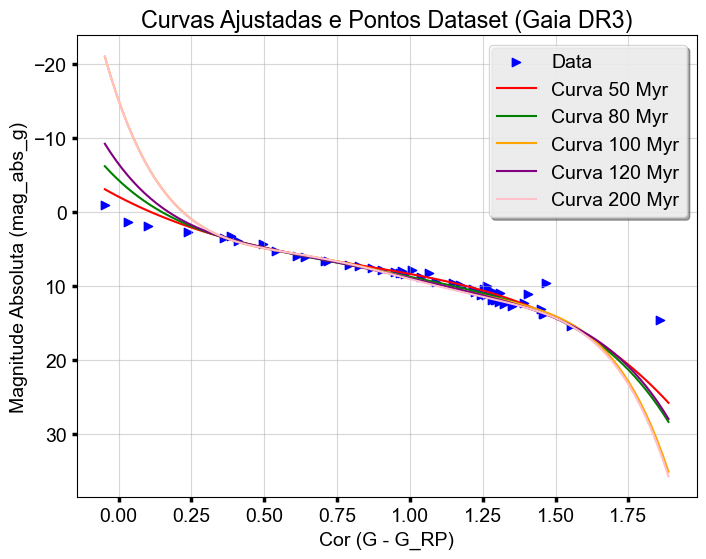

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)

# Filtros:
phot_g = df['phot_g_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# Mag abs
mag_abs_g = df['mag_abs_g']

# CURVAS:
# BHAC15_50myr
df_B_50 = pd.read_csv("bcah15_50myr.csv")
G_50 = df_B_50['G']
G_RP_50 = df_B_50['G_RP']

# BHAC15_80myr
df_B_80 = pd.read_csv("bcah15_80myr.csv")
G_80 = df_B_80['G']
G_RP_80 = df_B_80['G_RP']

# BHAC15_100myr
df_B_100 = pd.read_csv("bcah15_100myr.csv")
G_100 = df_B_100['G']
G_RP_100 = df_B_100['G_RP']

# BHAC15_120myr
df_B_120 = pd.read_csv("bcah15_120myr.csv")
G_120 = df_B_120['G']
G_RP_120 = df_B_120['G_RP']

# BHAC15_200myr
df_B_200 = pd.read_csv("bcah15_200myr.csv")
G_200 = df_B_200['G']
G_RP_200 = df_B_200['G_RP']

# Convertendo as colunas em arrays numpy (par ordenado)
curve_points_50 = np.column_stack((G_50 - G_RP_50, G_50))
curve_points_80 = np.column_stack((G_80 - G_RP_80, G_80))
curve_points_100 = np.column_stack((G_100 - G_RP_100, G_100))
curve_points_120 = np.column_stack((G_120 - G_RP_120, G_120))
curve_points_200 = np.column_stack((G_200 - G_RP_200, G_200))

par_points = np.column_stack((phot_g - phot_rp, mag_abs_g))

# Fit polynomial function to the curve points
degree = 5  # Choose the degree of the polynomial
coeffs_50 = np.polyfit(curve_points_50[:, 0], curve_points_50[:, 1], degree)
fitted_curve_50 = np.poly1d(coeffs_50)
coeffs_80 = np.polyfit(curve_points_80[:, 0], curve_points_80[:, 1], degree)
fitted_curve_80 = np.poly1d(coeffs_80)
coeffs_100 = np.polyfit(curve_points_100[:, 0], curve_points_100[:, 1], degree)
fitted_curve_100 = np.poly1d(coeffs_100)
coeffs_120 = np.polyfit(curve_points_120[:, 0], curve_points_120[:, 1], degree)
fitted_curve_120 = np.poly1d(coeffs_120)
coeffs_200 = np.polyfit(curve_points_200[:, 0], curve_points_200[:, 1], degree)
fitted_curve_200 = np.poly1d(coeffs_200)

# Calcula as distâncias verticais entre os pontos reais e as curvas ajustadas
distancias_50 = np.abs(fitted_curve_50(par_points[:, 0]) - par_points[:, 1])
distancias_80 = np.abs(fitted_curve_80(par_points[:, 0]) - par_points[:, 1])
distancias_100 = np.abs(fitted_curve_100(par_points[:, 0]) - par_points[:, 1])
distancias_120 = np.abs(fitted_curve_120(par_points[:, 0]) - par_points[:, 1])
distancias_200 = np.abs(fitted_curve_200(par_points[:, 0]) - par_points[:, 1])


# Limite de distância definido para determinar quais pontos estão próximos das curvas
limite_distancia = 0.5  # Ajuste o valor conforme necessário

# Encontra os índices dos pontos que atendem à condição (distância menor ou igual ao limite)
indices_proximos_50 = np.where(distancias_50 <= limite_distancia)[0]
indices_proximos_80 = np.where(distancias_80 <= limite_distancia)[0]
indices_proximos_100 = np.where(distancias_100 <= limite_distancia)[0]
indices_proximos_120 = np.where(distancias_120 <= limite_distancia)[0]
indices_proximos_200 = np.where(distancias_200 <= limite_distancia)[0]

# Cria um dicionário para associar os índices dos pontos com suas respectivas idades
idade_dict = {}

for i in range(len(par_points)):
    dist_to_curve_50 = distancias_50[i] if i in indices_proximos_50 else np.inf
    dist_to_curve_80 = distancias_80[i] if i in indices_proximos_80 else np.inf
    dist_to_curve_100 = distancias_100[i] if i in indices_proximos_100 else np.inf
    dist_to_curve_120 = distancias_120[i] if i in indices_proximos_120 else np.inf
    dist_to_curve_200 = distancias_200[i] if i in indices_proximos_200 else np.inf

    if dist_to_curve_50 < np.inf and dist_to_curve_80 < np.inf and dist_to_curve_100 < np.inf and dist_to_curve_120 < np.inf and dist_to_curve_200 < np.inf:
        peso_50 = 1 / (dist_to_curve_50 + 1e-6)
        peso_80 = 1 / (dist_to_curve_80 + 1e-6)
        peso_100 = 1 / (dist_to_curve_100 + 1e-6)
        peso_120 = 1 / (dist_to_curve_120 + 1e-6)
        peso_200 = 1 / (dist_to_curve_200 + 1e-6)
        
        idade_aproximada = (peso_50 * 50 + peso_80 * 80 + peso_100 * 100 + peso_120 * 120 + peso_200 * 200) / (peso_50 + peso_80 + peso_100 + peso_120 + peso_200)
    elif dist_to_curve_50 < np.inf:
        idade_aproximada = 50
    elif dist_to_curve_80 < np.inf:
        idade_aproximada = 80
    elif dist_to_curve_100 < np.inf:
        idade_aproximada = 100
    elif dist_to_curve_120 < np.inf:
        idade_aproximada = 120
    elif dist_to_curve_200 < np.inf:
        idade_aproximada = 200
    else:
        idade_aproximada = None

    idade_dict[i] = idade_aproximada

# Imprimir as idades correspondentes aos pontos
print("Índice do ponto - Idade:")
for idx, idade in idade_dict.items():
    if idade is None:
        print(f"{idx} - None")
    else:
        print(f"{idx} - {idade:.2f}")               
        
# Cria o gráfico
#plt.figure(figsize=(10, 6))

# Plota os pontos reais
plt.figure(figsize=(8, 6))
plt.scatter(par_points[:, 0], par_points[:, 1], c='blue', marker=">",label='Data')
#plt.scatter(par_points[:, 0], par_points[:, 1], color='blue', label='Data')

# Plota as curvas ajustadas
x_vals = np.linspace(min(par_points[:, 0]), max(par_points[:, 0]), 100)
plt.plot(x_vals, fitted_curve_50(x_vals), color='red', label='Curva 50 Myr')
plt.plot(x_vals, fitted_curve_80(x_vals), color='green', label='Curva 80 Myr')
plt.plot(x_vals, fitted_curve_100(x_vals), color='orange', label='Curva 100 Myr')
plt.plot(x_vals, fitted_curve_120(x_vals), color='purple', label='Curva 120 Myr')
plt.plot(x_vals, fitted_curve_200(x_vals), color='pink', label='Curva 200 Myr')


# Inverter o eixo y
plt.gca().invert_yaxis()
plt.xlabel('Cor (G - G_RP)')
plt.ylabel('Magnitude Absoluta (mag_abs_g)')
plt.title('Curvas Ajustadas e Pontos Dataset (Gaia DR3)')
plt.legend()
plt.grid(True)
plt.show()

# Cria uma nova coluna "BHC15_Myr" no DataFrame e preenche com as idades correspondentes
#df['BHAC15_Myr'] = [idade_dict.get(idx) for idx in range(len(par_points))]
#filename = 'VCA_MCM.csv'
#df.to_csv(filename)


Índice do ponto - Idade:
0 - None
1 - 89.19
2 - 60.66
3 - 50.00
4 - 111.94
5 - 106.32
6 - 104.00
7 - 103.71
8 - 96.81
9 - 156.10
10 - 108.86
11 - 97.62
12 - None
13 - 50.00
14 - 85.62
15 - 89.75
16 - 50.00
17 - None
18 - 50.00
19 - 100.00
20 - 100.00
21 - 101.20
22 - 50.00
23 - 120.00
24 - 50.00
25 - 101.97
26 - 80.00
27 - None
28 - 50.00
29 - 100.57
30 - 80.00
31 - 50.00
32 - 126.84
33 - 50.00
34 - 50.00
35 - 50.00
36 - 100.00
37 - 80.00
38 - 147.55
39 - None
40 - 100.00
41 - None
42 - None
43 - None
44 - None
45 - 80.00
46 - 142.82
47 - 103.74
48 - 50.00
49 - 81.16
50 - 50.00
51 - None
52 - None
53 - None
54 - 50.00
55 - 50.00
56 - 50.00
57 - 50.00
58 - None
59 - 50.00
60 - 50.00
61 - 106.08
62 - 50.00
63 - 50.00
64 - 80.00
Total de valores None: 13


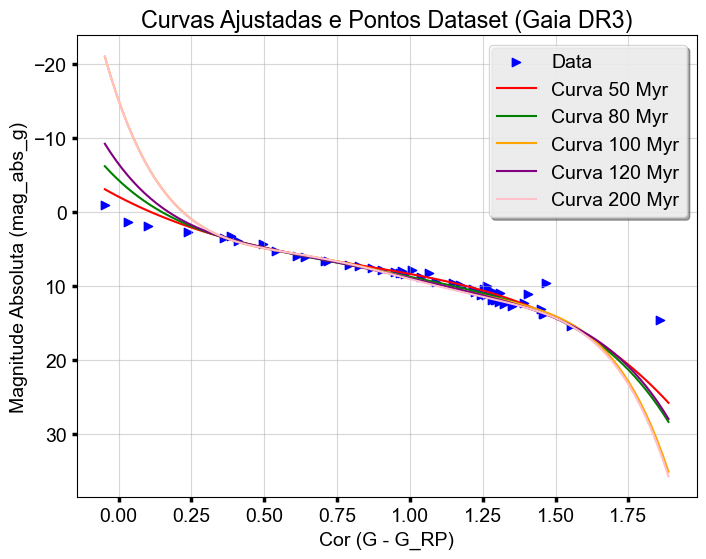

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)

# Filtros:
phot_g = df['phot_g_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# Mag abs
mag_abs_g = df['mag_abs_g']

# CURVAS:
# BHAC15_50myr
df_B_50 = pd.read_csv("bcah15_50myr.csv")
G_50 = df_B_50['G']
G_RP_50 = df_B_50['G_RP']

# BHAC15_80myr
df_B_80 = pd.read_csv("bcah15_80myr.csv")
G_80 = df_B_80['G']
G_RP_80 = df_B_80['G_RP']

# BHAC15_100myr
df_B_100 = pd.read_csv("bcah15_100myr.csv")
G_100 = df_B_100['G']
G_RP_100 = df_B_100['G_RP']

# BHAC15_120myr
df_B_120 = pd.read_csv("bcah15_120myr.csv")
G_120 = df_B_120['G']
G_RP_120 = df_B_120['G_RP']

# BHAC15_200myr
df_B_200 = pd.read_csv("bcah15_200myr.csv")
G_200 = df_B_200['G']
G_RP_200 = df_B_200['G_RP']

# Convertendo as colunas em arrays numpy (par ordenado)
curve_points_50 = np.column_stack((G_50 - G_RP_50, G_50))
curve_points_80 = np.column_stack((G_80 - G_RP_80, G_80))
curve_points_100 = np.column_stack((G_100 - G_RP_100, G_100))
curve_points_120 = np.column_stack((G_120 - G_RP_120, G_120))
curve_points_200 = np.column_stack((G_200 - G_RP_200, G_200))

par_points = np.column_stack((phot_g - phot_rp, mag_abs_g))

# Fit polynomial function to the curve points
degree = 5  # Choose the degree of the polynomial
coeffs_50 = np.polyfit(curve_points_50[:, 0], curve_points_50[:, 1], degree)
fitted_curve_50 = np.poly1d(coeffs_50)
coeffs_80 = np.polyfit(curve_points_80[:, 0], curve_points_80[:, 1], degree)
fitted_curve_80 = np.poly1d(coeffs_80)
coeffs_100 = np.polyfit(curve_points_100[:, 0], curve_points_100[:, 1], degree)
fitted_curve_100 = np.poly1d(coeffs_100)
coeffs_120 = np.polyfit(curve_points_120[:, 0], curve_points_120[:, 1], degree)
fitted_curve_120 = np.poly1d(coeffs_120)
coeffs_200 = np.polyfit(curve_points_200[:, 0], curve_points_200[:, 1], degree)
fitted_curve_200 = np.poly1d(coeffs_200)

# Calcula as distâncias verticais entre os pontos reais e as curvas ajustadas
distancias_50 = np.abs(fitted_curve_50(par_points[:, 0]) - par_points[:, 1])
distancias_80 = np.abs(fitted_curve_80(par_points[:, 0]) - par_points[:, 1])
distancias_100 = np.abs(fitted_curve_100(par_points[:, 0]) - par_points[:, 1])
distancias_120 = np.abs(fitted_curve_120(par_points[:, 0]) - par_points[:, 1])
distancias_200 = np.abs(fitted_curve_200(par_points[:, 0]) - par_points[:, 1])

# Limite de distância definido para determinar quais pontos estão próximos das curvas
limite_distancia = 0.5  # Ajuste o valor conforme necessário

# Encontra os índices dos pontos que atendem à condição (distância menor ou igual ao limite)
indices_proximos_50 = np.where(distancias_50 <= limite_distancia)[0]
indices_proximos_80 = np.where(distancias_80 <= limite_distancia)[0]
indices_proximos_100 = np.where(distancias_100 <= limite_distancia)[0]
indices_proximos_120 = np.where(distancias_120 <= limite_distancia)[0]
indices_proximos_200 = np.where(distancias_200 <= limite_distancia)[0]

# Cria um dicionário para associar os índices dos pontos com suas respectivas idades
idade_dict = {}
none_count = 0  # Contador para valores None

for i in range(len(par_points)):
    dist_to_curve_50 = distancias_50[i] if i in indices_proximos_50 else np.inf
    dist_to_curve_80 = distancias_80[i] if i in indices_proximos_80 else np.inf
    dist_to_curve_100 = distancias_100[i] if i in indices_proximos_100 else np.inf
    dist_to_curve_120 = distancias_120[i] if i in indices_proximos_120 else np.inf
    dist_to_curve_200 = distancias_200[i] if i in indices_proximos_200 else np.inf

    if dist_to_curve_50 < np.inf and dist_to_curve_80 < np.inf and dist_to_curve_100 < np.inf and dist_to_curve_120 < np.inf and dist_to_curve_200 < np.inf:
        peso_50 = 1 / (dist_to_curve_50 + 1e-6)
        peso_80 = 1 / (dist_to_curve_80 + 1e-6)
        peso_100 = 1 / (dist_to_curve_100 + 1e-6)
        peso_120 = 1 / (dist_to_curve_120 + 1e-6)
        peso_200 = 1 / (dist_to_curve_200 + 1e-6)
        
        idade_aproximada = (peso_50 * 50 + peso_80 * 80 + peso_100 * 100 + peso_120 * 120 + peso_200 * 200) / (peso_50 + peso_80 + peso_100 + peso_120 + peso_200)
    elif dist_to_curve_50 < np.inf:
        idade_aproximada = 50
    elif dist_to_curve_80 < np.inf:
        idade_aproximada = 80
    elif dist_to_curve_100 < np.inf:
        idade_aproximada = 100
    elif dist_to_curve_120 < np.inf:
        idade_aproximada = 120
    elif dist_to_curve_200 < np.inf:
        idade_aproximada = 200
    else:
        idade_aproximada = None
        none_count += 1  # Incrementar contador para valores None

    idade_dict[i] = idade_aproximada

# Imprimir as idades correspondentes aos pontos
print("Índice do ponto - Idade:")
for idx, idade in idade_dict.items():
    if idade is None:
        print(f"{idx} - None")
    else:
        print(f"{idx} - {idade:.2f}")               

# Imprimir o número de valores None
print(f"Total de valores None: {none_count}")

# Cria o gráfico
plt.figure(figsize=(8, 6))

# Plota os pontos reais
plt.scatter(par_points[:, 0], par_points[:, 1], c='blue', marker=">", label='Data')

# Plota as curvas ajustadas
x_vals = np.linspace(min(par_points[:, 0]), max(par_points[:, 0]), 100)
plt.plot(x_vals, fitted_curve_50(x_vals), color='red', label='Curva 50 Myr')
plt.plot(x_vals, fitted_curve_80(x_vals), color='green', label='Curva 80 Myr')
plt.plot(x_vals, fitted_curve_100(x_vals), color='orange', label='Curva 100 Myr')
plt.plot(x_vals, fitted_curve_120(x_vals), color='purple', label='Curva 120 Myr')
plt.plot(x_vals, fitted_curve_200(x_vals), color='pink', label='Curva 200 Myr')

# Inverter o eixo y
plt.gca().invert_yaxis()
plt.xlabel('Cor (G - G_RP)')
plt.ylabel('Magnitude Absoluta (mag_abs_g)')
plt.title('Curvas Ajustadas e Pontos Dataset (Gaia DR3)')
plt.legend()
plt.grid(True)
plt.show()

### Histograma com as idades do metodo polyfit/interpolação

Média das Idades: 80.63 Myr
Mediana das Idades: 80.00 Myr
Desvio Padrão das Idades: 29.75 Myr


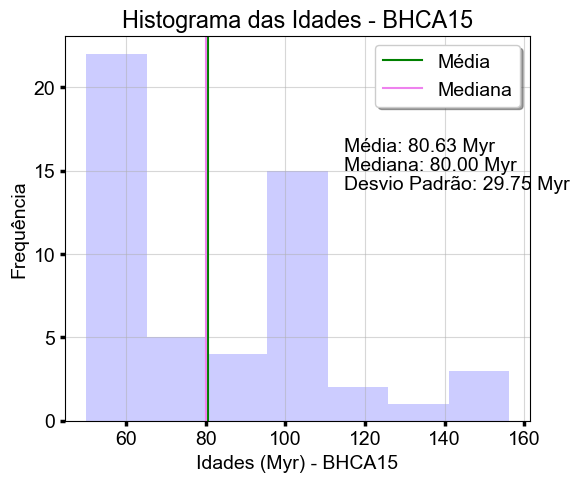

In [83]:
# Idades BHCA15
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('VCA_MCM.csv')
# Calcula a média, mediana e desvio padrão das idades
idades = df['BHAC15_Myr'].dropna()
media = np.mean(idades)
mediana = np.median(idades)
desvio_padrao = np.std(idades)

print(f'Média das Idades: {media:.2f} Myr')
print(f'Mediana das Idades: {mediana:.2f} Myr')
print(f'Desvio Padrão das Idades: {desvio_padrao:.2f} Myr')

# Cria um histograma das idades
plt.figure(figsize=(6, 5))
plt.hist(df['BHAC15_Myr'].dropna(), bins='auto', color='blue', alpha=0.2)
plt.axvline(x = media, color = 'green', label = 'Média')
plt.axvline(x = mediana, color = 'violet', label = 'Mediana')
plt.xlabel('Idades (Myr) - BHCA15')
plt.ylabel('Frequência')
plt.title('Histograma das Idades - BHCA15')
plt.legend(shadow=True)

# Adicionar informações de média, mediana e desvio padrão no gráfico
plt.text(0.60, 0.7, f'Média: {media:.2f} Myr', transform=plt.gca().transAxes)
plt.text(0.60, 0.65, f'Mediana: {mediana:.2f} Myr', transform=plt.gca().transAxes)
plt.text(0.60, 0.6, f'Desvio Padrão: {desvio_padrao:.2f} Myr', transform=plt.gca().transAxes)


plt.grid(True)
plt.savefig('hist_idades_BHAC15.png',dpi=600,facecolor='w')
plt.show()



### HISTOGRAMA USANDO BASE LOG NAS IDADES (PLOT QUE VAI PRO RELATORIO)

Média das Idades(log): 7.88 Myr
Mediana das Idades(log): 7.90 Myr
Desvio Padrão das Idades(log): 0.16 Myr


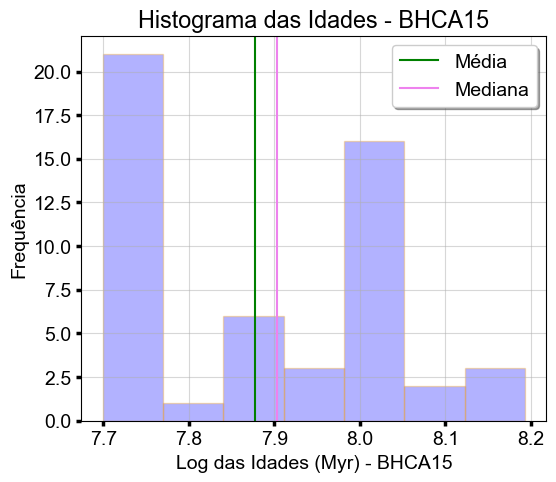

In [84]:
# Idades BHCA15
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('VCA_MCM.csv')
# Calcula a média, mediana e desvio padrão das idades
idades = np.log10(df['BHAC15_Myr'].dropna() * 1e6)
media = np.mean(idades)
mediana = np.median(idades)
desvio_padrao = np.std(idades)

print(f'Média das Idades(log): {media:.2f} Myr')
print(f'Mediana das Idades(log): {mediana:.2f} Myr')
print(f'Desvio Padrão das Idades(log): {desvio_padrao:.2f} Myr')


# Calcular média, mediana e desvio padrão dos valores normais
#media_normal = np.mean(idades_normal)
#mediana_normal = np.median(idades_normal)
#desvio_padrao_normal = np.std(idades_normal)

# Cria um histograma das idades
plt.figure(figsize=(6, 5))
plt.hist(idades, bins="auto", color='blue', edgecolor='orange',
              linewidth=1, alpha=0.3)
plt.axvline(x = media, color = 'green', label = 'Média')
plt.axvline(x = mediana, color = 'violet', label = 'Mediana')
plt.xlabel('Log das Idades (Myr) - BHCA15')
plt.ylabel('Frequência')
plt.title('Histograma das Idades - BHCA15')
plt.legend(shadow=True)
plt.grid(True)
plt.savefig('histlog_idades_BHAC15.png',dpi=600,facecolor='w')
plt.show()


#### TESTE EXCLUINDO OS OUTLIER DA AMOSTRA PARA ANALISAR OS DOIS PICOS DO HISTOGRAMA (SE ELES ERAM OS CONTAMINANTES)

Média das Idades(log): 82 Myr
Mediana das Idades(log): 80 Myr
Desvio Padrão das Idades(log): 30.80 Myr
Quantidade de membros que possuem idades excluindo todos os outliers:40 + 9


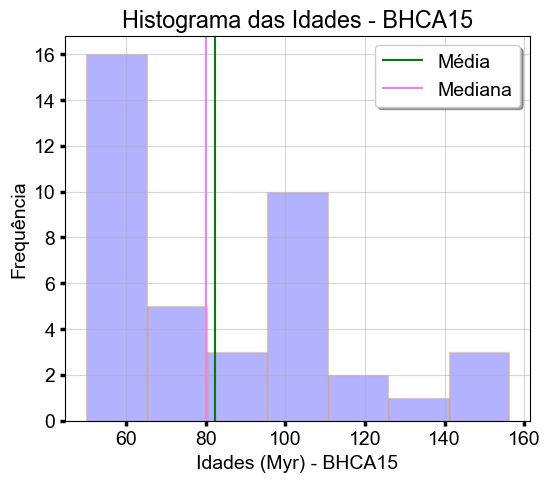

In [85]:
# Idades BHCA15
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('VCA_MCM.csv')
# Calcula a média, mediana e desvio padrão das idades
# Filtra os registros em que a coluna "Outlier" seja igual a 0 (i.é não é outlier)
df_filtrado = df[df["Outlier"] == 0]

idades = df_filtrado["BHAC15_Myr"].dropna()# pego só os inliers
media = np.mean(idades)
mediana = np.median(idades)
desvio_padrao = np.std(idades)

print(f'Média das Idades(log): {media:.0f} Myr')
print(f'Mediana das Idades(log): {mediana:.0f} Myr')
print(f'Desvio Padrão das Idades(log): {desvio_padrao:.2f} Myr')


# Calcular média, mediana e desvio padrão dos valores normais
#media_normal = np.mean(idades_normal)
#mediana_normal = np.median(idades_normal)
#desvio_padrao_normal = np.std(idades_normal)

# Cria um histograma das idades
plt.figure(figsize=(6, 5))
plt.hist(idades, bins="auto", color='blue', edgecolor='orange',
              linewidth=1, alpha=0.3)
plt.axvline(x = media, color = 'green', label = 'Média')
plt.axvline(x = mediana, color = 'violet', label = 'Mediana')
plt.xlabel('Idades (Myr) - BHCA15')
plt.ylabel('Frequência')
plt.title('Histograma das Idades - BHCA15')
plt.legend(shadow=True)
plt.grid(True)
#plt.savefig('histlog_idades_BHAC15.png',dpi=600,facecolor='w')
print(f"Quantidade de membros que possuem idades excluindo todos os outliers:{len(idades)} + 9")
plt.show()



## Parsec

Índice do ponto - Idade:
0 - 120.00
1 - 50.00
2 - 50.00
3 - 101.17
4 - 50.00
5 - 108.64
6 - 112.44
7 - 112.37
8 - 117.85
9 - 106.38
10 - 113.55
11 - 103.11
12 - 50.00
13 - 83.62
14 - 92.90
15 - 96.87
16 - 64.86
17 - 50.00
18 - 81.74
19 - 100.00
20 - 100.00
21 - 162.74
22 - 83.72
23 - 100.00
24 - 107.19
25 - 130.59
26 - 142.28
27 - None
28 - 82.44
29 - 129.31
30 - 80.00
31 - 91.06
32 - 144.31
33 - 91.20
34 - 99.95
35 - 89.41
36 - 100.00
37 - 80.00
38 - 126.76
39 - None
40 - 100.00
41 - 50.00
42 - None
43 - None
44 - 50.00
45 - 80.00
46 - 50.00
47 - 131.21
48 - 78.82
49 - 108.16
50 - 111.87
51 - 50.00
52 - None
53 - 50.00
54 - 88.89
55 - 95.23
56 - 91.26
57 - 86.75
58 - None
59 - 100.81
60 - 89.35
61 - 80.00
62 - 87.35
63 - 89.00
64 - 80.00


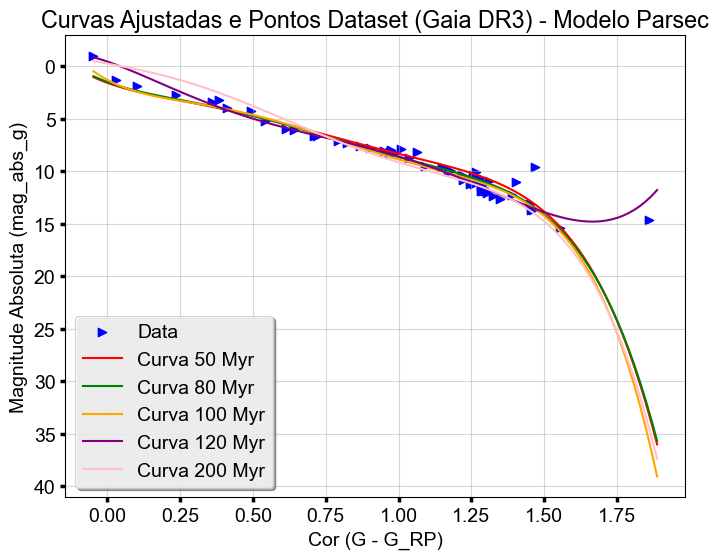

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)

df_50 = pd.read_csv("parsec_50myr.csv")
df_80 = pd.read_csv("parsec_80myr.csv")
df_100 = pd.read_csv("parsec_100myr.csv")
df_120 = pd.read_csv("parsec_120myr.csv")
df_200 = pd.read_csv("parsec_200myr.csv")

# Filtros:
phot_g = df['phot_g_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# Mag abs
mag_abs_g = df['mag_abs_g']

# CURVAS Parsec:
# Parsec_50myr
G_50 = df_50['Gmag'][:-220]
G_RP_50 = df_50['G_RPmag'][:-220]
# Parsec_80myr
G_80 = df_80['Gmag'][:-380]
G_RP_80 = df_80['G_RPmag'][:-380]
# Parsec_100myr
G_100 = df_100['Gmag'][:-340]
G_RP_100 = df_100['G_RPmag'][:-340]
# Parsec_120myr
G_120 = df_120['Gmag'][:-340]
G_RP_120 = df_120['G_RPmag'][:-340]
# Parsec_200myr
G_200 = df_200['Gmag'][:-310]
G_RP_200 = df_200['G_RPmag'][:-310]


# Convertendo as colunas em arrays numpy (par ordenado)
curve_points_50 = np.column_stack((G_50 - G_RP_50, G_50))
curve_points_80 = np.column_stack((G_80 - G_RP_80, G_80))
curve_points_100 = np.column_stack((G_100 - G_RP_100, G_100))
curve_points_120 = np.column_stack((G_120 - G_RP_120, G_120))
curve_points_200 = np.column_stack((G_200 - G_RP_200, G_200))

par_points = np.column_stack((phot_g - phot_rp, mag_abs_g))

# Fit polynomial function to the curve points
degree = 5  # Choose the degree of the polynomial
coeffs_50 = np.polyfit(curve_points_50[:, 0], curve_points_50[:, 1], degree)
fitted_curve_50 = np.poly1d(coeffs_50)
coeffs_80 = np.polyfit(curve_points_80[:, 0], curve_points_80[:, 1], degree)
fitted_curve_80 = np.poly1d(coeffs_80)
coeffs_100 = np.polyfit(curve_points_100[:, 0], curve_points_100[:, 1], degree)
fitted_curve_100 = np.poly1d(coeffs_100)
coeffs_120 = np.polyfit(curve_points_120[:, 0], curve_points_120[:, 1], degree)
fitted_curve_120 = np.poly1d(coeffs_120)
coeffs_200 = np.polyfit(curve_points_200[:, 0], curve_points_200[:, 1], degree)
fitted_curve_200 = np.poly1d(coeffs_200)

# Calcula as distâncias verticais entre os pontos reais e as curvas ajustadas
distancias_50 = np.abs(fitted_curve_50(par_points[:, 0]) - par_points[:, 1])
distancias_80 = np.abs(fitted_curve_80(par_points[:, 0]) - par_points[:, 1])
distancias_100 = np.abs(fitted_curve_100(par_points[:, 0]) - par_points[:, 1])
distancias_120 = np.abs(fitted_curve_120(par_points[:, 0]) - par_points[:, 1])
distancias_200 = np.abs(fitted_curve_200(par_points[:, 0]) - par_points[:, 1])


# Limite de distância definido para determinar quais pontos estão próximos das curvas
limite_distancia = 0.9  # Ajuste o valor conforme necessário

# Encontra os índices dos pontos que atendem à condição (distância menor ou igual ao limite)
indices_proximos_50 = np.where(distancias_50 <= limite_distancia)[0]
indices_proximos_80 = np.where(distancias_80 <= limite_distancia)[0]
indices_proximos_100 = np.where(distancias_100 <= limite_distancia)[0]
indices_proximos_120 = np.where(distancias_120 <= limite_distancia)[0]
indices_proximos_200 = np.where(distancias_200 <= limite_distancia)[0]

# Cria um dicionário para associar os índices dos pontos com suas respectivas idades
idade_dict = {}

for i in range(len(par_points)):
    dist_to_curve_50 = distancias_50[i] if i in indices_proximos_50 else np.inf
    dist_to_curve_80 = distancias_80[i] if i in indices_proximos_80 else np.inf
    dist_to_curve_100 = distancias_100[i] if i in indices_proximos_100 else np.inf
    dist_to_curve_120 = distancias_120[i] if i in indices_proximos_120 else np.inf
    dist_to_curve_200 = distancias_200[i] if i in indices_proximos_200 else np.inf

    if dist_to_curve_50 < np.inf and dist_to_curve_80 < np.inf and dist_to_curve_100 < np.inf and dist_to_curve_120 < np.inf and dist_to_curve_200 < np.inf:
        peso_50 = 1 / (dist_to_curve_50 + 1e-6)
        peso_80 = 1 / (dist_to_curve_80 + 1e-6)
        peso_100 = 1 / (dist_to_curve_100 + 1e-6)
        peso_120 = 1 / (dist_to_curve_120 + 1e-6)
        peso_200 = 1 / (dist_to_curve_200 + 1e-6)
        
        idade_aproximada = (peso_50 * 50 + peso_80 * 80 + peso_100 * 100 + peso_120 * 120 + peso_200 * 200) / (peso_50 + peso_80 + peso_100 + peso_120 + peso_200)
    elif dist_to_curve_50 < np.inf:
        idade_aproximada = 50
    elif dist_to_curve_80 < np.inf:
        idade_aproximada = 80
    elif dist_to_curve_100 < np.inf:
        idade_aproximada = 100
    elif dist_to_curve_120 < np.inf:
        idade_aproximada = 120
    elif dist_to_curve_200 < np.inf:
        idade_aproximada = 200
    else:
        idade_aproximada = None

    idade_dict[i] = idade_aproximada

# Imprimir as idades correspondentes aos pontos
print("Índice do ponto - Idade:")
for idx, idade in idade_dict.items():
    if idade is None:
        print(f"{idx} - None")
    else:
        print(f"{idx} - {idade:.2f}")               
        
# Cria o gráfico
#plt.figure(figsize=(10, 6))

# Plota os pontos reais
plt.figure(figsize=(8, 6))
plt.scatter(par_points[:, 0], par_points[:, 1], c='blue', marker=">",label='Data')
#plt.scatter(par_points[:, 0], par_points[:, 1], color='blue', label='Data')

# Plota as curvas ajustadas
x_vals = np.linspace(min(par_points[:, 0]), max(par_points[:, 0]), 100)
plt.plot(x_vals, fitted_curve_50(x_vals), color='red', label='Curva 50 Myr')
plt.plot(x_vals, fitted_curve_80(x_vals), color='green', label='Curva 80 Myr')
plt.plot(x_vals, fitted_curve_100(x_vals), color='orange', label='Curva 100 Myr')
plt.plot(x_vals, fitted_curve_120(x_vals), color='purple', label='Curva 120 Myr')
plt.plot(x_vals, fitted_curve_200(x_vals), color='pink', label='Curva 200 Myr')


# Inverter o eixo y
plt.gca().invert_yaxis()
plt.xlabel('Cor (G - G_RP)')
plt.ylabel('Magnitude Absoluta (mag_abs_g)')
plt.title('Curvas Ajustadas e Pontos Dataset (Gaia DR3) - Modelo Parsec')
plt.legend()
plt.grid(True)
plt.show()

# Cria uma nova coluna "Parsec_Myr" no DataFrame e preenche com as idades correspondentes
#df['Parsec_Myr'] = [idade_dict.get(idx) for idx in range(len(par_points))]
#filename = 'VCA_MCM.csv'
#df.to_csv(filename)



Índice do ponto - Idade:
0 - 120.00
1 - 50.00
2 - 50.00
3 - 101.17
4 - 50.00
5 - 108.64
6 - 112.44
7 - 112.37
8 - 117.85
9 - 106.38
10 - 113.55
11 - 103.11
12 - 50.00
13 - 83.62
14 - 92.90
15 - 96.87
16 - 64.86
17 - 50.00
18 - 81.74
19 - 100.00
20 - 100.00
21 - 162.74
22 - 83.72
23 - 100.00
24 - 107.19
25 - 130.59
26 - 142.28
27 - None
28 - 82.44
29 - 129.31
30 - 80.00
31 - 91.06
32 - 144.31
33 - 91.20
34 - 99.95
35 - 89.41
36 - 100.00
37 - 80.00
38 - 126.76
39 - None
40 - 100.00
41 - 50.00
42 - None
43 - None
44 - 50.00
45 - 80.00
46 - 50.00
47 - 131.21
48 - 78.82
49 - 108.16
50 - 111.87
51 - 50.00
52 - None
53 - 50.00
54 - 88.89
55 - 95.23
56 - 91.26
57 - 86.75
58 - None
59 - 100.81
60 - 89.35
61 - 80.00
62 - 87.35
63 - 89.00
64 - 80.00
Contagem de pontos com idade None: 6


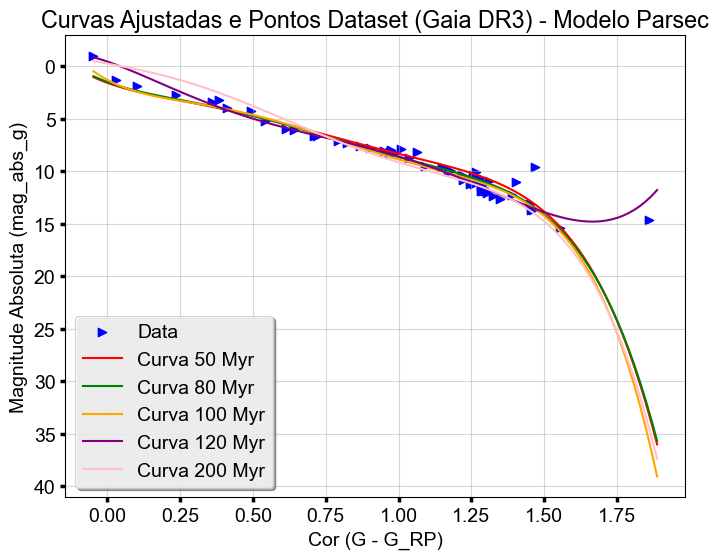

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Importar datasets
VCA = "VCA_MCM.csv"
df = pd.read_csv(VCA)

df_50 = pd.read_csv("parsec_50myr.csv")
df_80 = pd.read_csv("parsec_80myr.csv")
df_100 = pd.read_csv("parsec_100myr.csv")
df_120 = pd.read_csv("parsec_120myr.csv")
df_200 = pd.read_csv("parsec_200myr.csv")

# Filtros:
phot_g = df['phot_g_mean_mag']
phot_rp = df['phot_rp_mean_mag']

# Mag abs
mag_abs_g = df['mag_abs_g']

# CURVAS Parsec:
# Parsec_50myr
G_50 = df_50['Gmag'][:-220]
G_RP_50 = df_50['G_RPmag'][:-220]
# Parsec_80myr
G_80 = df_80['Gmag'][:-380]
G_RP_80 = df_80['G_RPmag'][:-380]
# Parsec_100myr
G_100 = df_100['Gmag'][:-340]
G_RP_100 = df_100['G_RPmag'][:-340]
# Parsec_120myr
G_120 = df_120['Gmag'][:-340]
G_RP_120 = df_120['G_RPmag'][:-340]
# Parsec_200myr
G_200 = df_200['Gmag'][:-310]
G_RP_200 = df_200['G_RPmag'][:-310]

# Convertendo as colunas em arrays numpy (par ordenado)
curve_points_50 = np.column_stack((G_50 - G_RP_50, G_50))
curve_points_80 = np.column_stack((G_80 - G_RP_80, G_80))
curve_points_100 = np.column_stack((G_100 - G_RP_100, G_100))
curve_points_120 = np.column_stack((G_120 - G_RP_120, G_120))
curve_points_200 = np.column_stack((G_200 - G_RP_200, G_200))

par_points = np.column_stack((phot_g - phot_rp, mag_abs_g))

# Fit polynomial function to the curve points
degree = 5  # Choose the degree of the polynomial
coeffs_50 = np.polyfit(curve_points_50[:, 0], curve_points_50[:, 1], degree)
fitted_curve_50 = np.poly1d(coeffs_50)
coeffs_80 = np.polyfit(curve_points_80[:, 0], curve_points_80[:, 1], degree)
fitted_curve_80 = np.poly1d(coeffs_80)
coeffs_100 = np.polyfit(curve_points_100[:, 0], curve_points_100[:, 1], degree)
fitted_curve_100 = np.poly1d(coeffs_100)
coeffs_120 = np.polyfit(curve_points_120[:, 0], curve_points_120[:, 1], degree)
fitted_curve_120 = np.poly1d(coeffs_120)
coeffs_200 = np.polyfit(curve_points_200[:, 0], curve_points_200[:, 1], degree)
fitted_curve_200 = np.poly1d(coeffs_200)

# Calcula as distâncias verticais entre os pontos reais e as curvas ajustadas
distancias_50 = np.abs(fitted_curve_50(par_points[:, 0]) - par_points[:, 1])
distancias_80 = np.abs(fitted_curve_80(par_points[:, 0]) - par_points[:, 1])
distancias_100 = np.abs(fitted_curve_100(par_points[:, 0]) - par_points[:, 1])
distancias_120 = np.abs(fitted_curve_120(par_points[:, 0]) - par_points[:, 1])
distancias_200 = np.abs(fitted_curve_200(par_points[:, 0]) - par_points[:, 1])

# Limite de distância definido para determinar quais pontos estão próximos das curvas
limite_distancia = 0.9  # Ajuste o valor conforme necessário

# Encontra os índices dos pontos que atendem à condição (distância menor ou igual ao limite)
indices_proximos_50 = np.where(distancias_50 <= limite_distancia)[0]
indices_proximos_80 = np.where(distancias_80 <= limite_distancia)[0]
indices_proximos_100 = np.where(distancias_100 <= limite_distancia)[0]
indices_proximos_120 = np.where(distancias_120 <= limite_distancia)[0]
indices_proximos_200 = np.where(distancias_200 <= limite_distancia)[0]

# Cria um dicionário para associar os índices dos pontos com suas respectivas idades
idade_dict = {}

for i in range(len(par_points)):
    dist_to_curve_50 = distancias_50[i] if i in indices_proximos_50 else np.inf
    dist_to_curve_80 = distancias_80[i] if i in indices_proximos_80 else np.inf
    dist_to_curve_100 = distancias_100[i] if i in indices_proximos_100 else np.inf
    dist_to_curve_120 = distancias_120[i] if i in indices_proximos_120 else np.inf
    dist_to_curve_200 = distancias_200[i] if i in indices_proximos_200 else np.inf

    if dist_to_curve_50 < np.inf and dist_to_curve_80 < np.inf and dist_to_curve_100 < np.inf and dist_to_curve_120 < np.inf and dist_to_curve_200 < np.inf:
        peso_50 = 1 / (dist_to_curve_50 + 1e-6)
        peso_80 = 1 / (dist_to_curve_80 + 1e-6)
        peso_100 = 1 / (dist_to_curve_100 + 1e-6)
        peso_120 = 1 / (dist_to_curve_120 + 1e-6)
        peso_200 = 1 / (dist_to_curve_200 + 1e-6)
        
        idade_aproximada = (peso_50 * 50 + peso_80 * 80 + peso_100 * 100 + peso_120 * 120 + peso_200 * 200) / (peso_50 + peso_80 + peso_100 + peso_120 + peso_200)
    elif dist_to_curve_50 < np.inf:
        idade_aproximada = 50
    elif dist_to_curve_80 < np.inf:
        idade_aproximada = 80
    elif dist_to_curve_100 < np.inf:
        idade_aproximada = 100
    elif dist_to_curve_120 < np.inf:
        idade_aproximada = 120
    elif dist_to_curve_200 < np.inf:
        idade_aproximada = 200
    else:
        idade_aproximada = None

    idade_dict[i] = idade_aproximada

# Contagem de quantos são None
none_count = sum(1 for idade in idade_dict.values() if idade is None)

# Imprimir as idades correspondentes aos pontos e a contagem de None
print("Índice do ponto - Idade:")
for idx, idade in idade_dict.items():
    if idade is None:
        print(f"{idx} - None")
    else:
        print(f"{idx} - {idade:.2f}")

print(f"Contagem de pontos com idade None: {none_count}")

# Cria o gráfico
plt.figure(figsize=(8, 6))
plt.scatter(par_points[:, 0], par_points[:, 1], c='blue', marker=">", label='Data')

# Plota as curvas ajustadas
x_vals = np.linspace(min(par_points[:, 0]), max(par_points[:, 0]), 100)
plt.plot(x_vals, fitted_curve_50(x_vals), color='red', label='Curva 50 Myr')
plt.plot(x_vals, fitted_curve_80(x_vals), color='green', label='Curva 80 Myr')
plt.plot(x_vals, fitted_curve_100(x_vals), color='orange', label='Curva 100 Myr')
plt.plot(x_vals, fitted_curve_120(x_vals), color='purple', label='Curva 120 Myr')
plt.plot(x_vals, fitted_curve_200(x_vals), color='pink', label='Curva 200 Myr')

# Inverter o eixo y
plt.gca().invert_yaxis()
plt.xlabel('Cor (G - G_RP)')
plt.ylabel('Magnitude Absoluta (mag_abs_g)')
plt.title('Curvas Ajustadas e Pontos Dataset (Gaia DR3) - Modelo Parsec')
plt.legend()
plt.grid(True)
plt.show()

# Cria uma nova coluna "Parsec_Myr" no DataFrame e preenche com as idades correspondentes
# df['Parsec_Myr'] = [idade_dict.get(idx) for idx in range(len(par_points))]
# filename = 'VCA_MCM.csv'
# df.to_csv(filename)



Média das Idades: 92 Myr
Mediana das Idades: 91 Myr
Desvio Padrão das Idades: 26.17 Myr
Incerteza: 3.41 Myr


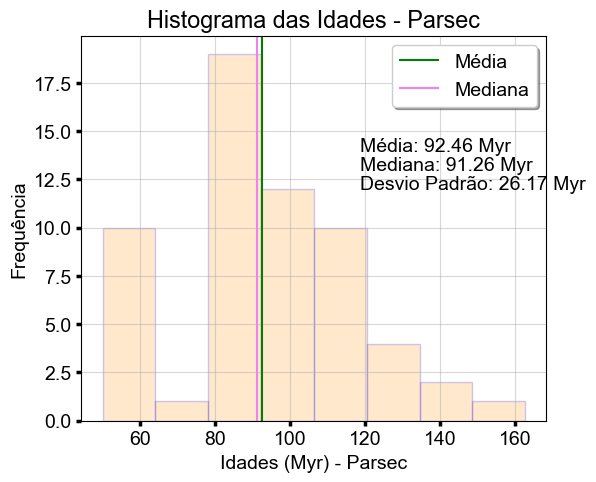

In [88]:
# Idades PARSEC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('VCA_MCM.csv')
# Calcula a média, mediana e desvio padrão das idades
idades = df['Parsec_Myr'].dropna()
media = np.mean(idades)
mediana = np.median(idades)
desvio_padrao = np.std(idades)
incerteza = desvio_padrao/np.sqrt(len(idades))

print(f'Média das Idades: {media:.0f} Myr')
print(f'Mediana das Idades: {mediana:.0f} Myr')
print(f'Desvio Padrão das Idades: {desvio_padrao:.2f} Myr')
print(f'Incerteza: {incerteza:.2f} Myr')

# Cria um histograma das idades
plt.figure(figsize=(6, 5))
plt.hist(df['Parsec_Myr'].dropna(), bins=8, color='darkorange',  edgecolor='blue', linewidth=1, alpha=0.2)
plt.axvline(x = media, color = 'green', label = 'Média')
plt.axvline(x = mediana, color = 'violet', label = 'Mediana')
plt.xlabel('Idades (Myr) - Parsec')
plt.ylabel('Frequência')
plt.title('Histograma das Idades - Parsec')
plt.legend(shadow=True)
plt.grid(True)

# Adicionar informações de média, mediana e desvio padrão no gráfico
plt.text(0.60, 0.7, f'Média: {media:.2f} Myr', transform=plt.gca().transAxes)
plt.text(0.60, 0.65, f'Mediana: {mediana:.2f} Myr', transform=plt.gca().transAxes)
plt.text(0.60, 0.6, f'Desvio Padrão: {desvio_padrao:.2f} Myr', transform=plt.gca().transAxes)


plt.grid(True)
plt.savefig('hist_idades_Parsec.png',dpi=600,facecolor='w')
plt.show()


plt.show()



### HISTOGRAMA USANDO BASE LOG PARA O MODELO PARSEC

Média das Idades(log): 7.95 Myr
Mediana das Idades(log): 7.96 Myr
Desvio Padrão das Idades(log): 0.13 Myr


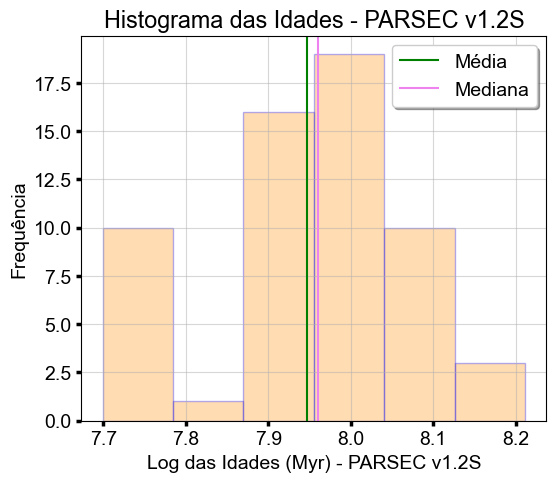

In [89]:
# Idades BHCA15
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('VCA_MCM.csv')
# Calcula a média, mediana e desvio padrão das idades
idades = np.log10(df['Parsec_Myr'].dropna() * 1e6)

media = np.mean(idades)
mediana = np.median(idades)
desvio_padrao = np.std(idades)

print(f'Média das Idades(log): {media:.2f} Myr')
print(f'Mediana das Idades(log): {mediana:.2f} Myr')
print(f'Desvio Padrão das Idades(log): {desvio_padrao:.2f} Myr')


# Calcular média, mediana e desvio padrão dos valores normais
#media_normal = np.mean(idades_normal)
#mediana_normal = np.median(idades_normal)
#desvio_padrao_normal = np.std(idades_normal)

# Cria um histograma das idades
plt.figure(figsize=(6, 5))
plt.hist(idades, bins=6, color='darkorange', edgecolor='blue', linewidth=1, alpha=0.3)
plt.axvline(x = media, color = 'green', label = 'Média')
plt.axvline(x = mediana, color = 'violet', label = 'Mediana')
plt.xlabel('Log das Idades (Myr) - PARSEC v1.2S')
plt.ylabel('Frequência')
plt.title('Histograma das Idades - PARSEC v1.2S')
plt.legend(shadow=True)
plt.grid(True)
plt.savefig('histlog_idades_Parsec.png',dpi=600,facecolor='w')
plt.show()

